## Business Understanding

### Company Overview
Lending Club is a prominent consumer finance marketplace that connects borrowers with investors. The company provides a range of loans to urban customers, including personal, business, and medical loans. When evaluating a loan application, Lending Club must make a critical decision based on the applicant's profile.

1. **Loss of Business**: If an applicant who is likely to repay the loan is not approved, the company misses out on potential revenue and business growth.
2. **Financial Risk**: If an applicant who is likely to default is approved, the company faces financial losses due to non-repayment.

### Data Description
The dataset contains historical information about loan applicants and their loan statuses. The statuses are:
- **Fully Paid**: The applicant has successfully repaid the entire loan.
- **Current**: The loan is still active and being repaid by the applicant.
- **Charged-Off**: The applicant has defaulted on the loan and has not made payments for an extended period.

Rejected loan applications are not included in the dataset, as there is no transaction history for these applicants.

## Business Objectives

### Problem Statement
The company faces significant credit loss when borrowers default on their loans. Identifying high-risk borrowers who are likely to default is essential to minimizing financial losses.

### Analysis Goal
The objective of this case study is to use Exploratory Data Analysis (EDA) to uncover patterns and identify key factors that predict loan default. By understanding these factors, Lending Club can:

- **Reduce Credit Loss**: Minimize the number of loans granted to high-risk individuals, thereby reducing potential financial losses.
- **Optimize Loan Approval**: Make informed decisions about loan approvals, amounts, and interest rates.

### Key Sources of Credit Loss
1. **Applicants Likely to Repay**: Rejecting these applicants leads to lost business opportunities and potential revenue.
2. **Applicants Likely to Default**: Approving these applicants results in financial losses due to non-repayment.

By accurately identifying these two types of applicants, Lending Club can enhance its lending strategy, reduce financial risk, and improve profitability. Understanding the driving factors behind loan defaults will support better portfolio management and risk assessment, leading to more effective decision-making in loan management.


## Data Analysis

### Importing Python Libraries and reading the loan csv file.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns 
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

In [2]:
df = pd.read_csv("loan.csv")

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

## Column Level Analysis and Cleanup

### Decide on which columns to drop
- Check if we have any columns with all NULL values and drop them.
- Check if we have any columns where:
    -   **values are all NULL**
    -    **values are only zero**
    -    **values are constant**.

There are four main methods to identify and treat missing data:
- ```isnull()```: Indicates presence of missing values, returns a boolean
- ```notnull()```: Opposite of ```isnull()```, returns a boolean
- ```dropna()```: Drops the missing values from a data frame and returns the rest
- ```fillna()```: Fills (or imputes) the missing values by a specified value

In [5]:
# Create a boolean Series that indicates if each column is entirely null
null_cols = df.isnull().all()
print("Count of null columns: ",null_cols.sum())

Count of null columns:  54


In [6]:
# Drop columns where all values are null using boolean indexing
df = df.loc[:, ~null_cols]

In [7]:
df.shape

(39717, 57)

Note that some columns have extremely **large number of missing values**, such as mths_since_last_record, next_pymnt_d, etc. In such cases, one should be careful in handling missing values, since if you replace them by arbitrary numbers such as mean, median etc., the entire further analysis may throw unrealistic or unexpected results.
Hence dropping those.

In [8]:
#Check for the % of null/missing values is above 90%
missing_percentage = df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 90].index
print(columns_to_drop)


Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [9]:
#Dropping the columns with more than 90% missing values
df = df.drop(columns=columns_to_drop)

In [10]:
df.shape

(39717, 55)

### 1. Columns with Zero Values
Columns where all values are zero are identified as they won't be helpful for analysis. These columns will be excluded because they don't provide any meaningful variation or information.

### 2. Columns with Constant Values
Columns with only one unique value (constant columns) are identified. Since these columns do not vary and provide no useful information for distinguishing between different observations, they will be excluded.

### 3. Columns with Unique Identifiers
Columns where every value is unique for each row (unique identifier columns) are identified. These columns are often identifiers and do not provide useful information for analysis, so they will be excluded.

### 4. Columns Not Needed for Analysis
Certain columns are deemed unnecessary for the analysis due to their nature or high percentage of missing values. Specifically:
- **Identifiers and URLs**: 'id', 'member_id, 'url'
- **Descriptive Fields**: 'title', 'desc', 'zip_code'
- **Columns with High Cardinality or Significant Mising Values - Has 26925 unique values and we won't be able to get more insights**: 'emp_title', 'mths_since_last_delinq' (64.66% missing)
- **Columns Related to Payments and Recoveries**: 'collection_recovery_fee', 'pub_rec', 'recoveries', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'last_pymnt_amnt'
-  **Duplicate Columns:** funded_amnt_inv is closely a duplicate of funded_amnt_inv and hence will not be of much help for the analysis.

The following columns will be dropped from the DataFrame based on te criteria above.


In [11]:
# Identify columns with 0 values as they won't be helpful for analysis
cols_all_zero = [col for col in df.columns if (df[col] == 0).all()]

# Identify columns with constant values (single unique value)
cols_constant = [col for col in df.columns if df[col].nunique() == 1]

# Identify unique identifier columns
cols_one_unique_identifier = [col for col in df.columns if df[col].nunique() == df.shape[0]]

# Columns not needed for analysis based on the description
cols_not_for_analysis = [
    'id', 'member_id', 'url', 'title', 'desc', 'zip_code', 'emp_title',
    'collection_recovery_fee', 'last_credit_pull_d', 'pub_rec', 
    'recoveries', 'total_pymnt', 'mths_since_last_delinq', 'total_pymnt_inv', 
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'last_pymnt_d', 'funded_amnt_inv', 
    'out_prncp', 'out_prncp_inv', 'last_pymnt_amnt'
]

# Print columns identified for exclusion
print("Columns with Zero Values:", cols_all_zero)
print("Columns with Constant Values:", cols_constant)
print("Columns with only all unique values and may not help for analysis:", cols_one_unique_identifier)

# Combine all columns to drop
cols_to_drop = set(cols_all_zero + cols_constant + cols_one_unique_identifier + cols_not_for_analysis)

# Display columns to be dropped
print("Columns to Drop:", cols_to_drop)

Columns with Zero Values: ['acc_now_delinq', 'delinq_amnt']
Columns with Constant Values: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
Columns with only all unique values and may not help for analysis: ['id', 'member_id', 'url']
Columns to Drop: {'title', 'initial_list_status', 'delinq_amnt', 'last_credit_pull_d', 'chargeoff_within_12_mths', 'member_id', 'out_prncp', 'total_pymnt', 'tax_liens', 'total_rec_int', 'total_rec_prncp', 'policy_code', 'mths_since_last_delinq', 'total_rec_late_fee', 'application_type', 'id', 'funded_amnt_inv', 'emp_title', 'total_pymnt_inv', 'acc_now_delinq', 'collections_12_mths_ex_med', 'last_pymnt_amnt', 'zip_code', 'pymnt_plan', 'pub_rec', 'url', 'recoveries', 'collection_recovery_fee', 'out_prncp_inv', 'desc', 'last_pymnt_d'}


In [12]:
#Dropping the unwanted columns
df.drop(columns=cols_to_drop, inplace = True)

In [13]:
df.shape

(39717, 24)

## Row Level Analysis and Cleanup

In [14]:
# Chek for rows with complete empty/ missing values
df.isnull().all(axis=1).sum()

0

Since there are no rows having all missing values, we are proceeding with the next steps of Data Conversion, Imputation and Outlier treatment

## DataType Conversion 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [16]:
#Organizing the data by dividing them into numerical and categorical ones
numerical_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 
    'open_acc', 'pub_rec_bankruptcies', 'revol_util', 'revol_bal' , 'total_acc', 'inq_last_6mths']
# Convert categorical variables to type "category"
categorical_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [17]:
#Convert loan_amnt and funded_amnt to float - just to maintain consistency
df['loan_amnt'] = df['loan_amnt'].astype('float')
df['funded_amnt'] = df['funded_amnt'].astype('float')

# Convert interest rate from string to float
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

# Convert revolving utilization from string to float and divide by 100 since it's percentage
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

In [18]:
# Convert date columns to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [19]:
# Convert employment length to numerical format
df['emp_length'] = df['emp_length'].replace({'10+ years': 10, '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                             '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8,
                                             '9 years': 9}).astype(float)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  float64       
 1   funded_amnt           39717 non-null  float64       
 2   term                  39717 non-null  category      
 3   int_rate              39717 non-null  float64       
 4   installment           39717 non-null  float64       
 5   grade                 39717 non-null  category      
 6   sub_grade             39717 non-null  category      
 7   emp_length            38642 non-null  float64       
 8   home_ownership        39717 non-null  category      
 9   annual_inc            39717 non-null  float64       
 10  verification_status   39717 non-null  category      
 11  issue_d               39717 non-null  datetime64[ns]
 12  loan_status           39717 non-null  category      
 13  purpose         

Now that all the data types are showing up in appropriate format, proceeding with further analysis

In [21]:
df.shape

(39717, 24)

## Generate Functions to get the overall statistics and do the plotting

In [22]:
#Calculate percentage of charged off's of each column

def plot_defaulting_percent(df, column, palette = 'coolwarm'):
    # Group by column and loan_status to get counts
    counts = df.groupby([column, 'loan_status']).size().unstack(fill_value=0)
    
    # Calculate totals and ratios
    counts['Total'] = counts['Charged Off'] + counts['Fully Paid'] + counts['Current']
    counts['Percentage_fully_paid'] = ((counts['Fully Paid'] / counts['Total']) * 100).round(2)
    counts['Percentage_charge_off'] = ((counts['Charged Off'] / counts['Total']) * 100).round(2)
    print(counts)

    # Sort by total count in descending order
    percentage_df = counts[['Percentage_charge_off']].sort_values(by='Percentage_charge_off', ascending=False)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.barplot(x=percentage_df.index, y='Percentage_charge_off', data=percentage_df.reset_index(), palette=palette)
    plt.title(f'Percentage of Charged-Off Loans by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage of Charged-Off Loans (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

In [23]:
# Function to remove outliers based on IQR

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [24]:
# Function to create univariate plots

def univariate_analysis(column, data, plot_type='hist', palette = None):
    plt.figure(figsize=(8, 6))
  
    if plot_type == 'bar':
        sns.countplot(x=column, data=data, palette = palette)
        plt.title(f'Count Plot of {column}')
        
    elif plot_type == 'bar_stack':
        # Calculate count and percentage
        count_data = df[column].value_counts()
        count_data_percentage = count_data / count_data.sum() * 100
        count_df = count_data.reset_index()
        count_df.columns = [column, 'count']
        count_df['percentage'] = count_df['count'] / count_df['count'].sum() * 100

        sns.barplot(x=column, y='count', data=count_df, palette=palette)
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        for p in plt.gca().patches:
            height = p.get_height()
            plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}', ha='center')

    elif plot_type == 'count':
        sns.countplot(x=column, data=df, order=sorted(df[column].unique()), palette = palette)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count Plot of {column}')

            
    elif plot_type == 'pie':
        count_data = df[column].value_counts()
        plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', colors=sns.color_palette(palette, len(count_data)))
        plt.title(f'Pie Chart of {column}')

    elif plot_type == 'hist':
        sns.histplot(data[column].dropna(), kde=True , palette = palette)
        plt.title(f'Distribution of {column}')
        
    elif plot_type == 'box':
        sns.boxplot(x=data[column].dropna(), palette = palette)
        plt.title(f'Box Plot of {column}')
        
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
#Function to define all the plots used in bivariate analysis

def bivariate_analysis(df, x, y, plot_type='box', hue=None, palette='coolwarm'):
    plt.figure(figsize=(8, 6))
    plot_df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])] # Since we need to plot only the plots against these two statuses.        
    if plot_type == 'box':
        sns.boxplot(x=x, y=y, data=plot_df, palette=palette)
        plt.title(f'{x} by {y}')
        plt.xlabel(x)
        plt.ylabel(y)
    
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=plot_df, palette=palette)
        plt.xlabel(x)
        plt.ylabel('Count')
        plt.title(f'{x} Distribution by {y}')

    elif plot_type == 'percentage':
        summary = plot_df.groupby([x, y]).size().unstack(fill_value=0)
        summary = summary.div(summary.sum(axis=1), axis=0) * 100
        summary.plot(kind='bar', stacked=True, colormap=palette, ax=plt.gca())
        plt.title(f'Percentage Distribution of {y} by {x}')
        plt.xlabel(x)
        plt.ylabel('Percentage (%)')
        plt.legend(title=y)
    
    elif plot_type == 'scatter':
        sns.scatterplot(x=x, y=y, data=plot_df, hue=hue, palette=palette)
        plt.title(f'Scatter Plot of {x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
    
    elif plot_type == 'density':
        sns.kdeplot(data=plot_df, x=x, hue=hue, fill=True, palette=palette)
        plt.title(f'Density Plot of {x} by {hue}')
        plt.xlabel(x)
        plt.ylabel('Density')

    elif plot_type == 'violin':
        sns.violinplot(x=x, y=y, data=plot_df, palette=palette)
        plt.title(f'Violin Plot of {x} by {y}')
        plt.xlabel(x)
        plt.ylabel(y)
    
    elif plot_type == 'hist':
        sns.histplot(data=plot_df, x=x, hue=hue, kde=True, palette=palette, bins=10, multiple='stack')
        plt.title(f'Histogram of {x} by {hue}')
        plt.xlabel(x)
        plt.ylabel('Frequency')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [26]:
def dynamic_binning(df, column, num_bins=5, custom_bins=None):

    if custom_bins:
        # Use custom bins if provided
        bins = custom_bins
    else:
        min_value = df[column].min()
        max_value = df[column].max()
        bins = pd.qcut(df[column], q=num_bins, retbins=True)[1]
        labels = [f'{round(bins[i], 3)}-{round(bins[i + 1], 3)}' for i in range(len(bins) - 1)]
    return bins, labels


### Handle Outliers for annual_inc, funded_amnt, loan_amnt, int_rate

In [27]:
# Print original dataset size
print(f"Original dataset size: {df.shape[0]}")

# List of columns to remove outliers from
outlier_cols = ['annual_inc', 'funded_amnt', 'loan_amnt', 'int_rate']

# Remove outliers from each column
for column in outlier_cols:
    df = remove_outliers_iqr(df, column)

# Print cleaned dataset size
print(f"Cleaned dataset size (IQR): {df.shape[0]}")

Original dataset size: 39717
Cleaned dataset size (IQR): 36837


## Imputing and Handling Missing Values

In [28]:
#CHeck for missing value % in each column
total_rows = len(df)
for col in df.columns:
    missing_len = df[col].isnull().sum()
    missing_percentage = (missing_len / total_rows) * 100
    print(f'Missing values in {col}: {missing_len} ({missing_percentage:.2f}%)')

Missing values in loan_amnt: 0 (0.00%)
Missing values in funded_amnt: 0 (0.00%)
Missing values in term: 0 (0.00%)
Missing values in int_rate: 0 (0.00%)
Missing values in installment: 0 (0.00%)
Missing values in grade: 0 (0.00%)
Missing values in sub_grade: 0 (0.00%)
Missing values in emp_length: 1038 (2.82%)
Missing values in home_ownership: 0 (0.00%)
Missing values in annual_inc: 0 (0.00%)
Missing values in verification_status: 0 (0.00%)
Missing values in issue_d: 0 (0.00%)
Missing values in loan_status: 0 (0.00%)
Missing values in purpose: 0 (0.00%)
Missing values in addr_state: 0 (0.00%)
Missing values in dti: 0 (0.00%)
Missing values in delinq_2yrs: 0 (0.00%)
Missing values in earliest_cr_line: 0 (0.00%)
Missing values in inq_last_6mths: 0 (0.00%)
Missing values in open_acc: 0 (0.00%)
Missing values in revol_bal: 0 (0.00%)
Missing values in revol_util: 49 (0.13%)
Missing values in total_acc: 0 (0.00%)
Missing values in pub_rec_bankruptcies: 661 (1.79%)


- We only have missing values in emp_length and revol_util and here is how we are handling it.
~ 2.8% is missing for emp_length. We neither would need those rows to be deleted, not want to eplace with the mode. Any of this approach won't give accurate results.
- For imputing the revol_util column missing values, checked replacing them with mean and median. Since there is no much difference, going with the median approach.

In [29]:
# Impute missing values in emp_length with -1
df['emp_length'].fillna(-1, inplace=True)

In [30]:
# Calculate the median of revol_util
median_revol_util = df['revol_util'].median()

# Impute using median
df['revol_util'] = df['revol_util'].fillna(median_revol_util)


## Deriving New Columns

In [31]:
# Create a new column indicating whether emp_length was missing
df['emp_length_missing'] = df['emp_length'].apply(lambda x: 1 if x == -1 else 0)

# Loan-to-Income Ratio: To check for the borrower's ability to repay the loan
df['loan_to_income'] = df['loan_amnt'] / df['annual_inc']

# Credit Line Age in years
df['credit_line_age'] = ((df['issue_d'] - df['earliest_cr_line']).dt.days) / 365.25

# Interaction between interest rate and loan amount
df['int_rate_loan_amnt'] = df['int_rate'] * df['loan_amnt']

# Extract year and month of issue_d
df["issue_d_year"]=df["issue_d"].dt.strftime('%Y') 
df["issue_d_month"]=df["issue_d"].dt.strftime('%m') 

In [32]:
# Define and apply dynamic binning to columns
binning_params = {
    'loan_to_income': {'num_bins': 5},
    'loan_amnt': {'num_bins': 10},
    'annual_inc': {'num_bins': 5},
    'int_rate_loan_amnt': {'num_bins': 10},
    'credit_line_age': {'num_bins':5},
    'revol_util' : {'num_bins': 8},
    'dti' : {'num_bins': 5},
    'installment' : {'num_bins': 5}
}

# Apply dynamic binning and create categorical columns
for column, params in binning_params.items():
    bins, labels = dynamic_binning(df, column, **params)
    df[f'{column}_cat'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True, ordered=False)

# Employee length categorical column
df['emp_length_cat'] = pd.Categorical(df['emp_length'], categories=range(-1, 11), ordered=True)

After adding all these derived columns, here is the shape of the data set and we are ready for the proper analysis which helps us get the insights

In [33]:
df.shape

(36837, 39)

## Univariate Analysis

In [34]:
#Get the descriptive insights about the numerical variables
desc_stats = df[numerical_cols].describe()
print(desc_stats)

          loan_amnt   funded_amnt      int_rate   installment     annual_inc  \
count  36837.000000  36837.000000  36837.000000  36837.000000   36837.000000   
mean   10278.438119  10059.493851     11.853588    300.557736   60509.786449   
std     6288.174611   6085.255648      3.608876    181.375670   27826.140256   
min      500.000000    500.000000      5.420000     15.690000    4000.000000   
25%     5000.000000   5000.000000      8.940000    162.230000   40000.000000   
50%     9000.000000   9000.000000     11.710000    266.730000   55000.000000   
75%    14400.000000  14000.000000     14.270000    398.390000   76200.000000   
max    28750.000000  28750.000000     22.110000   1021.000000  145008.000000   

                dti   delinq_2yrs      open_acc  pub_rec_bankruptcies  \
count  36837.000000  36837.000000  36837.000000          36176.000000   
mean      13.454070      0.144882      9.156310              0.044670   
std        6.669051      0.490926      4.346812             

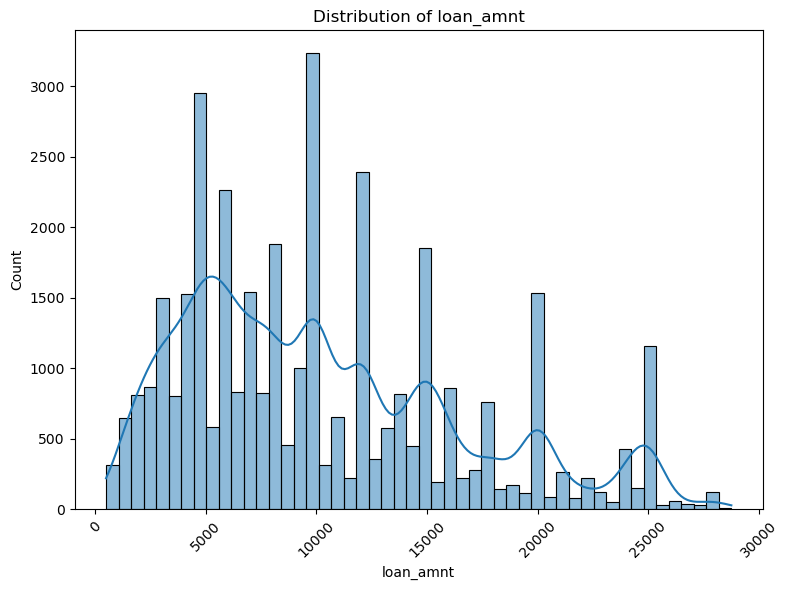

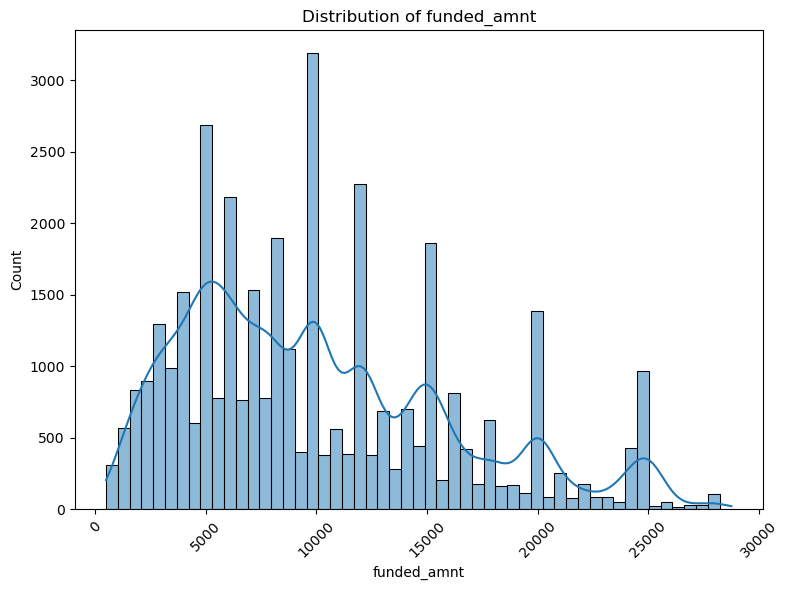

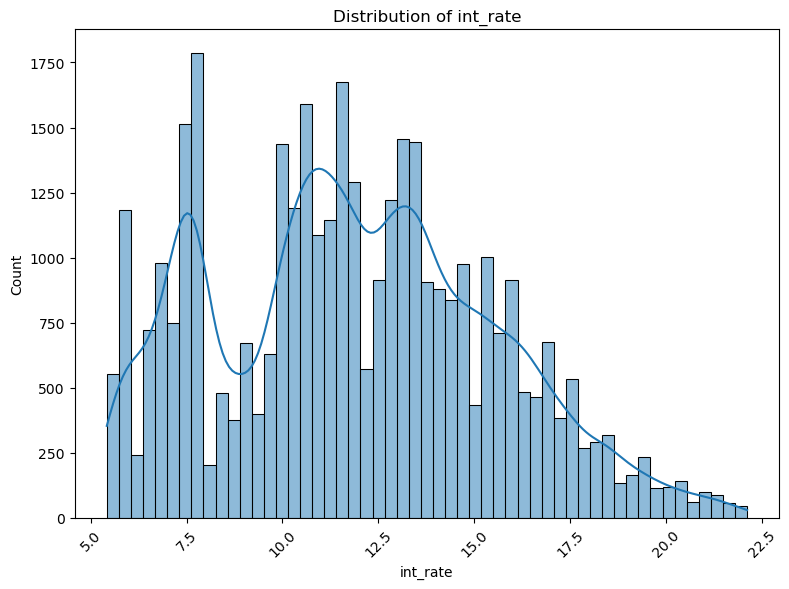

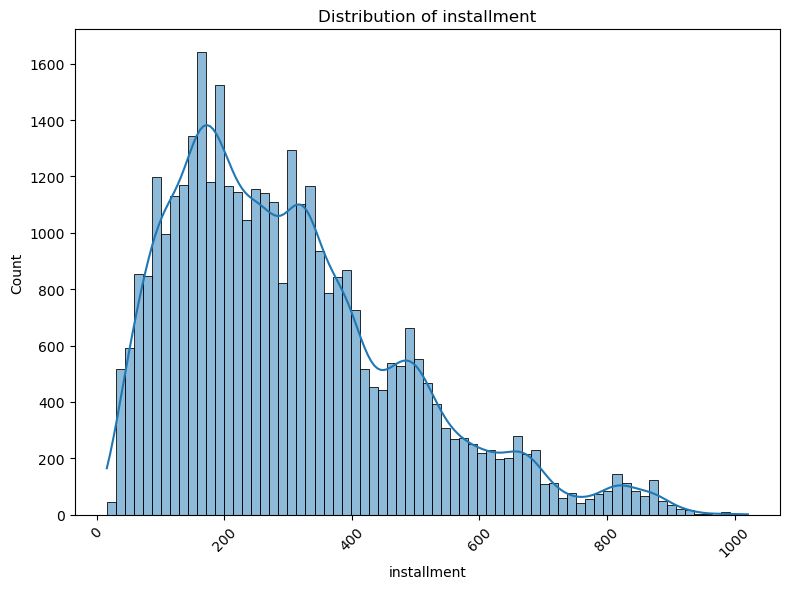

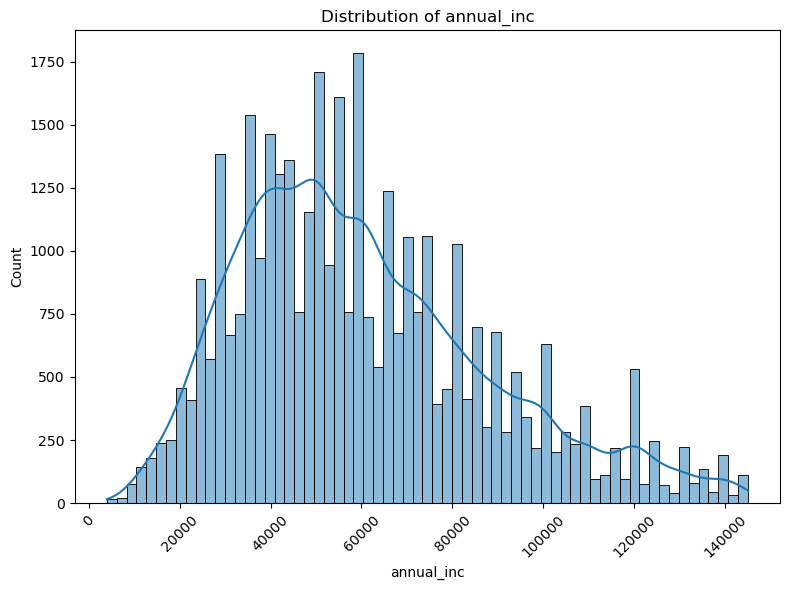

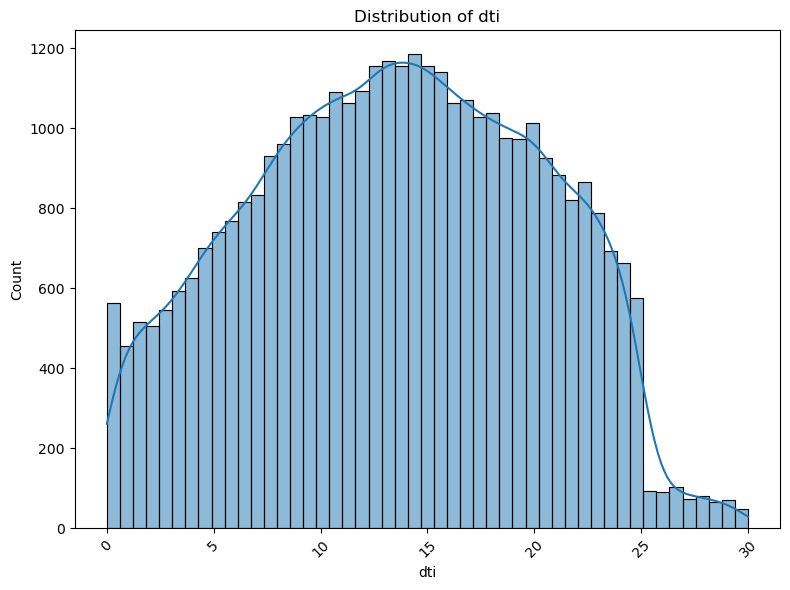

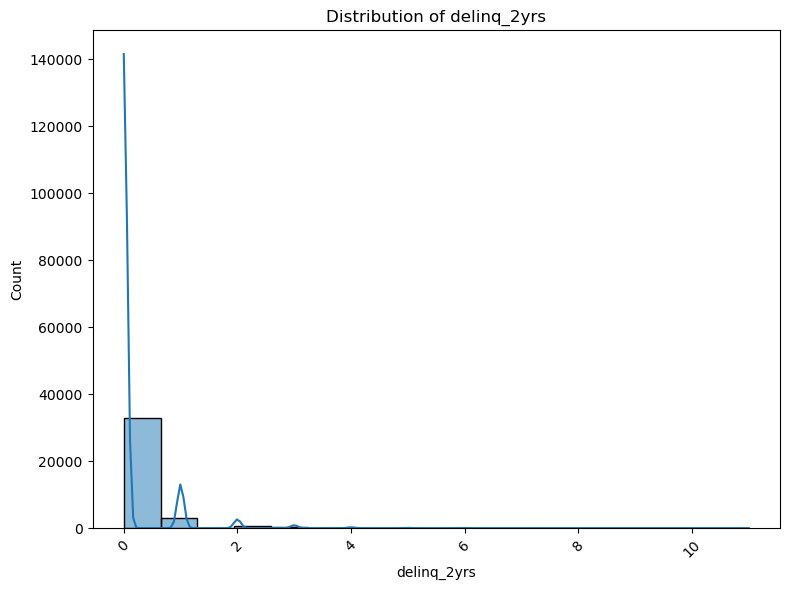

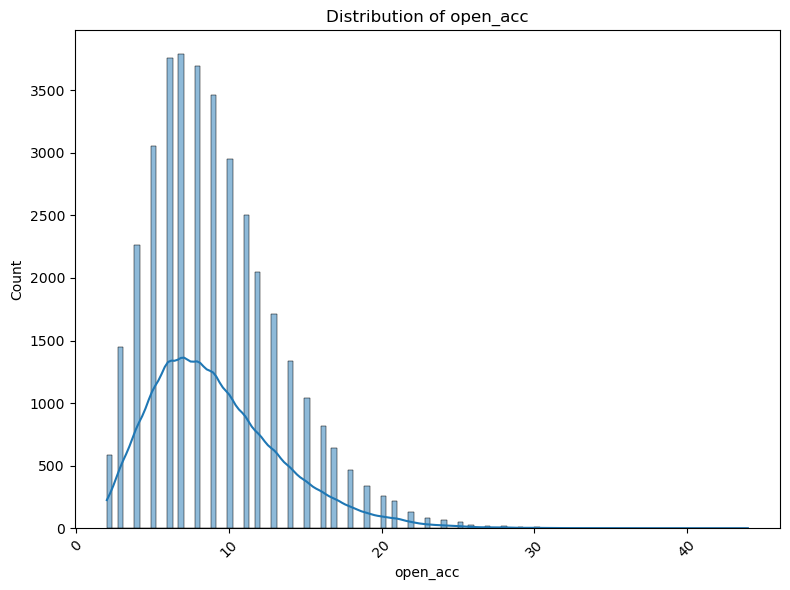

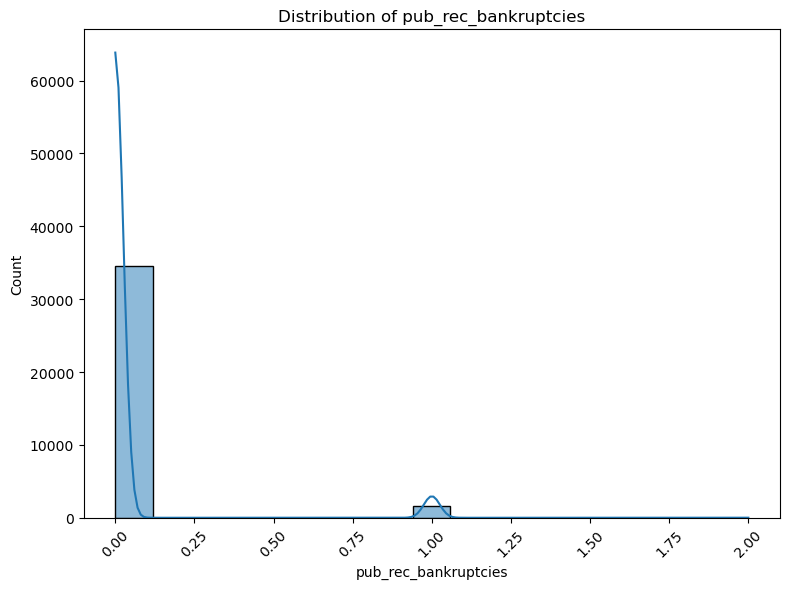

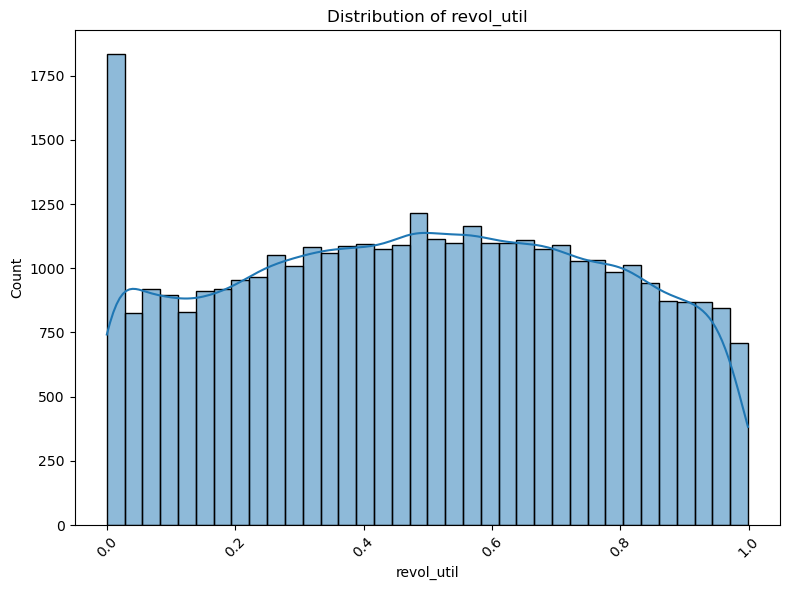

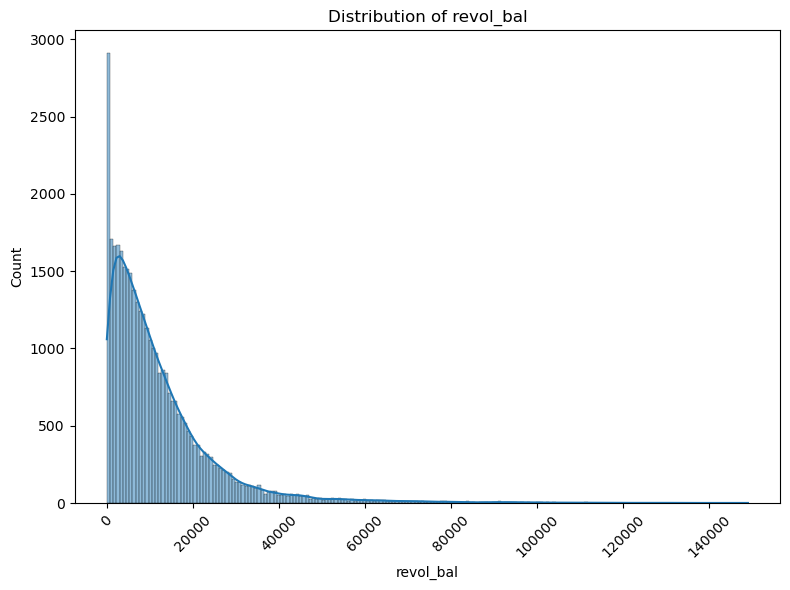

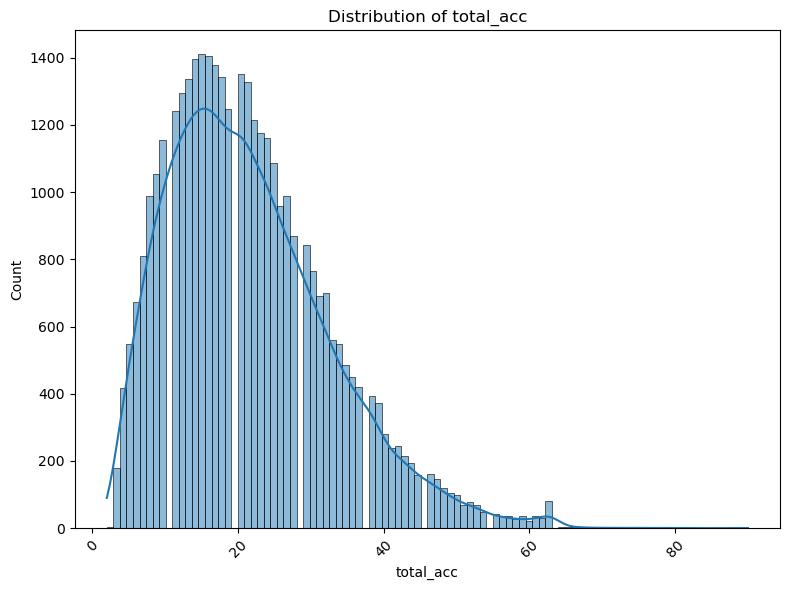

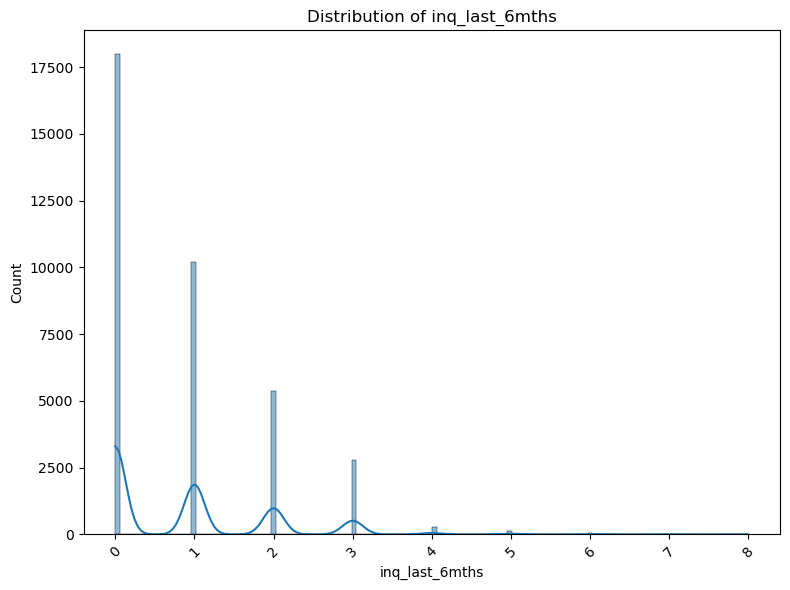

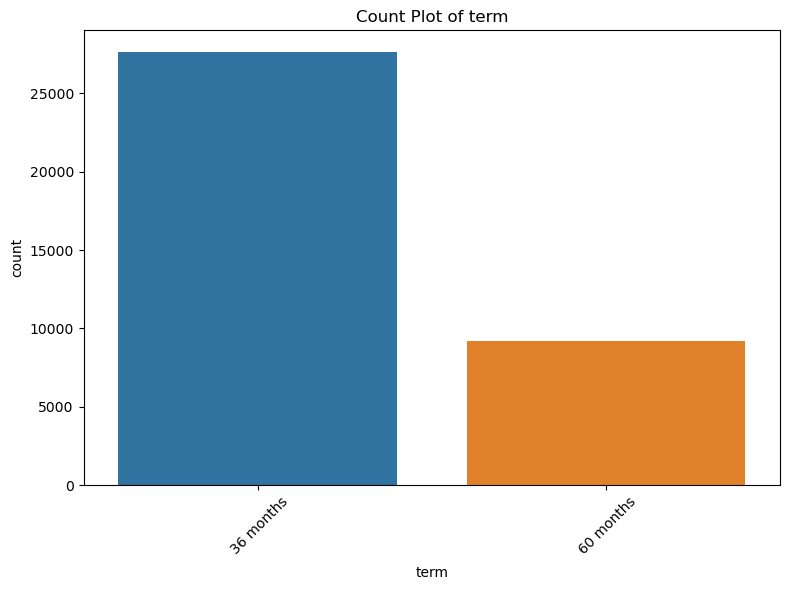

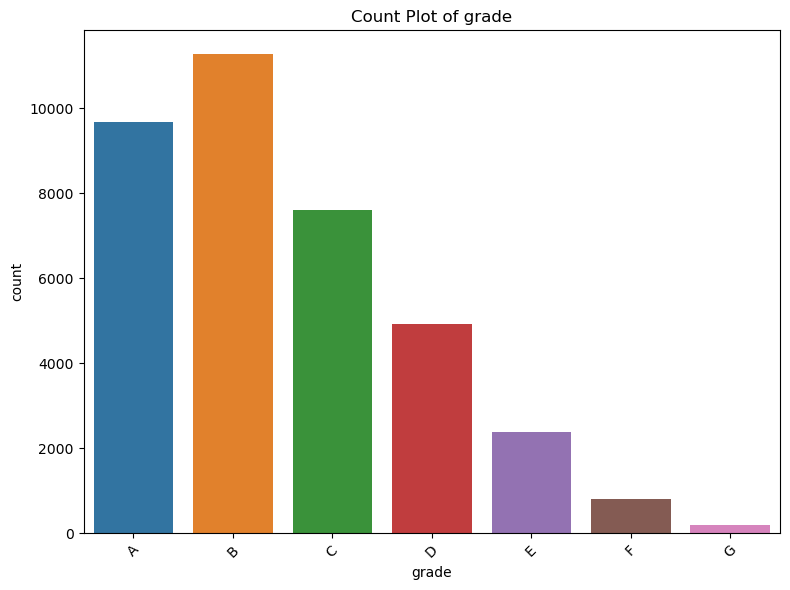

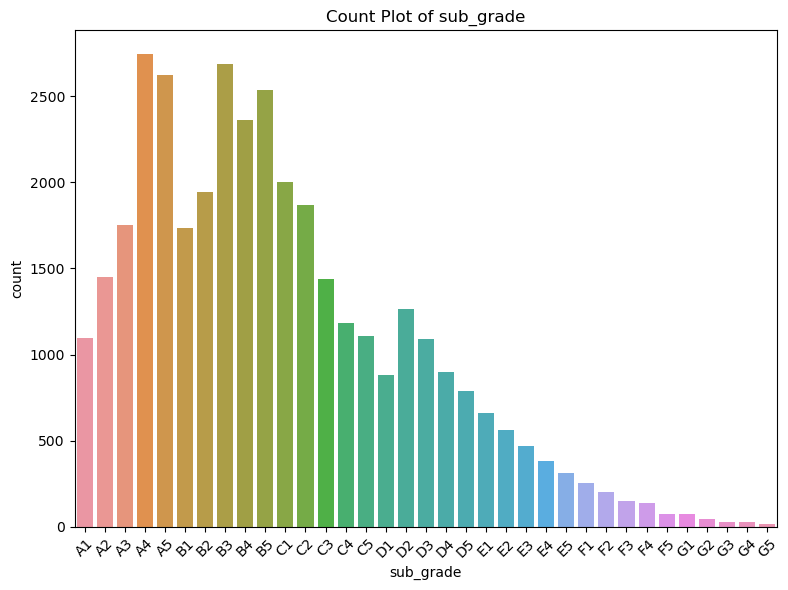

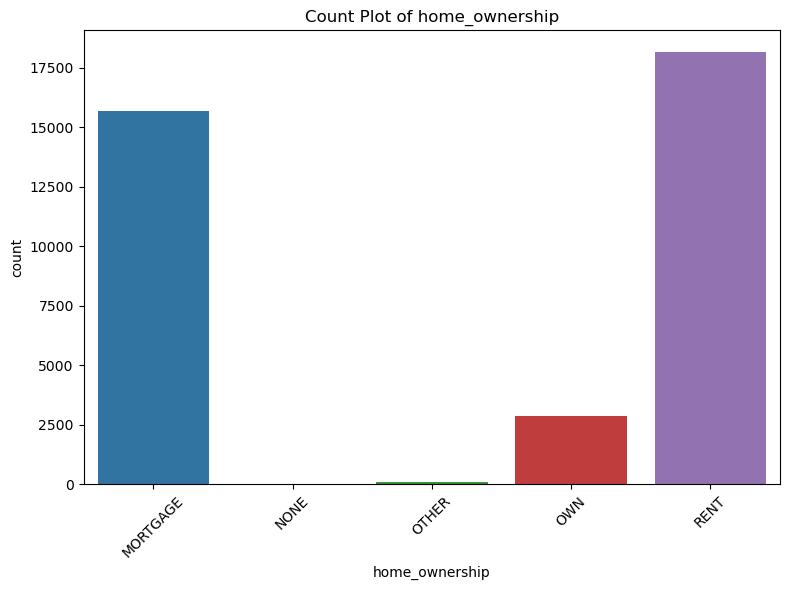

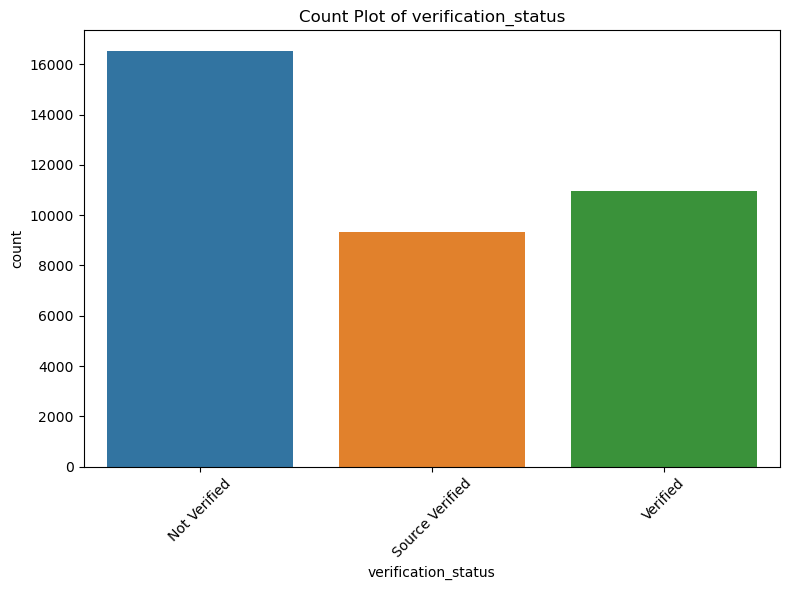

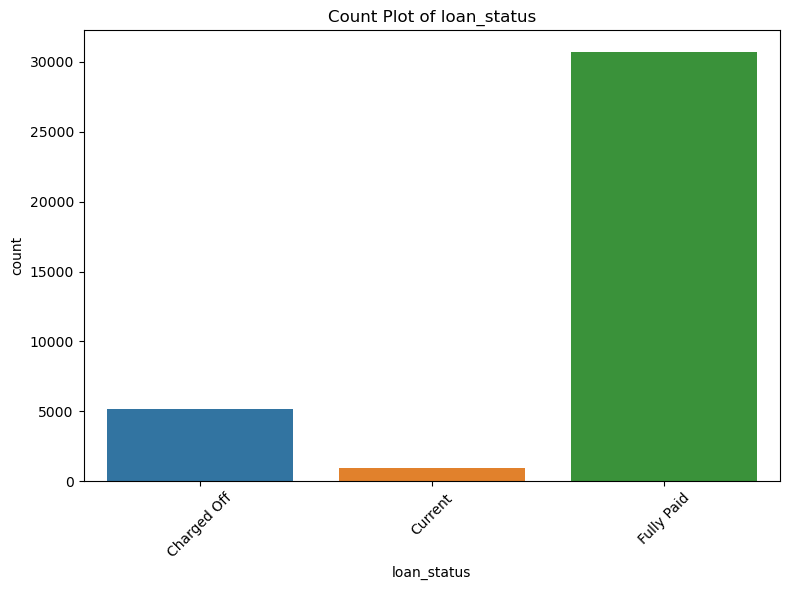

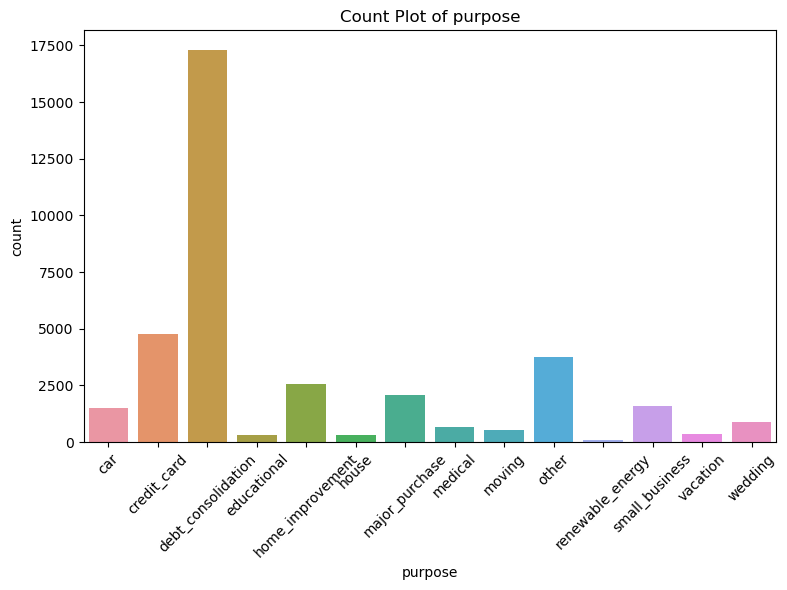

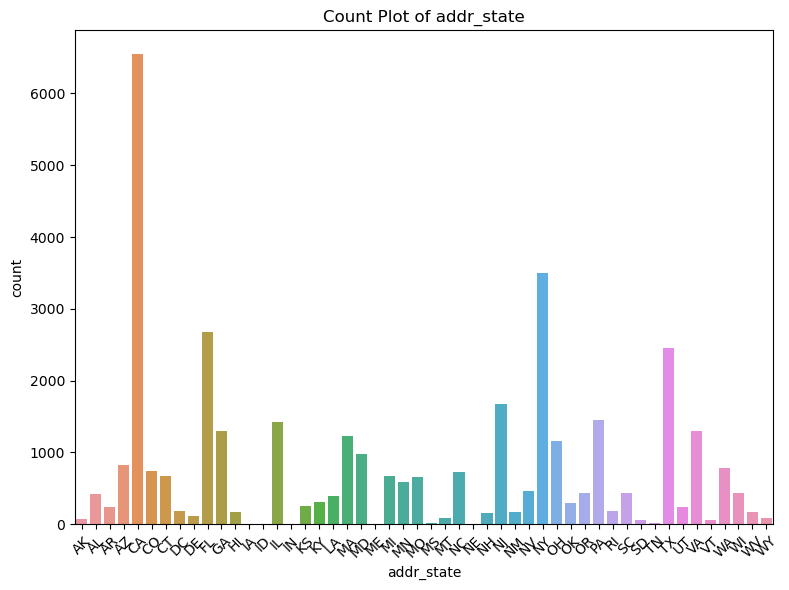

In [35]:
# Plot for each numerical column
for column in numerical_cols:
    univariate_analysis(column, df, plot_type='hist')

# Plot for each categorical column
for column in categorical_cols:
    univariate_analysis(column, df, plot_type='bar')

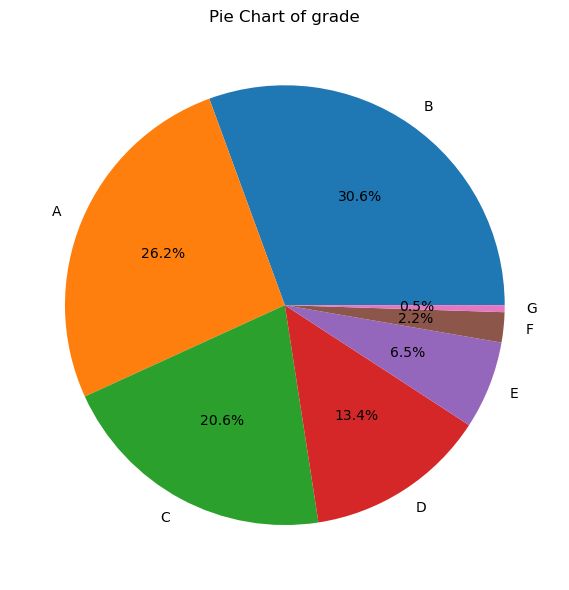

In [36]:
univariate_analysis('grade', df, plot_type = 'pie')

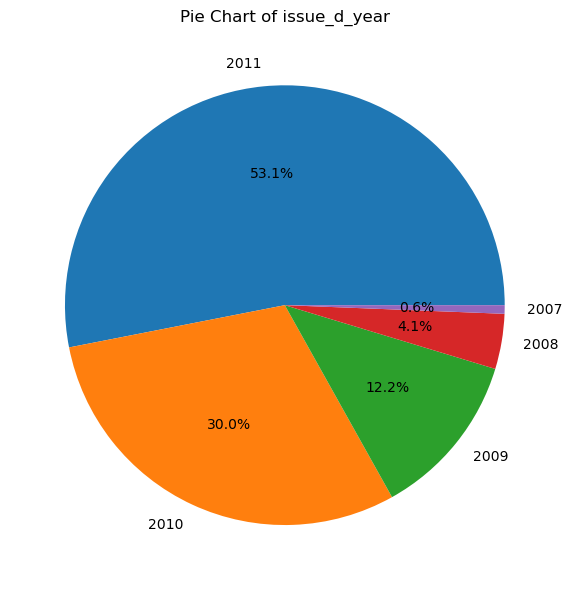

In [37]:
univariate_analysis('issue_d_year', df, plot_type='pie')

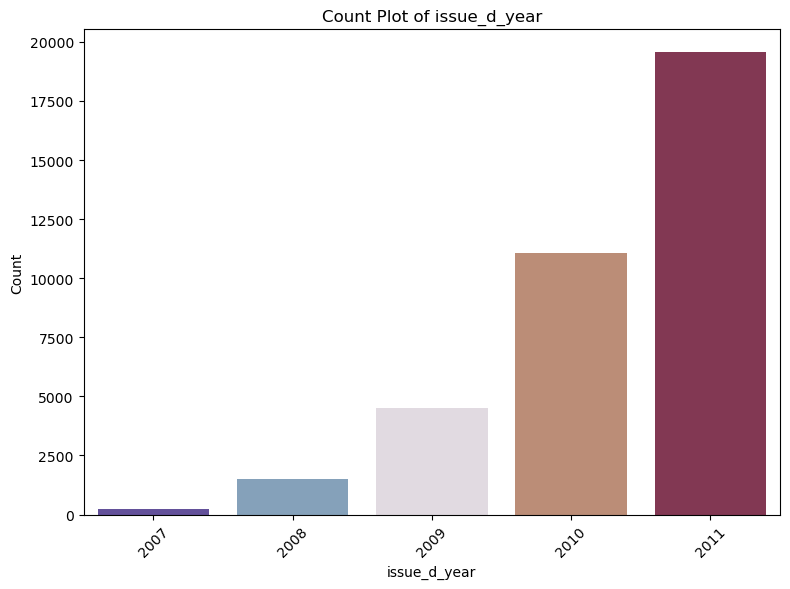

In [38]:
univariate_analysis('issue_d_year',df, plot_type='count', palette='twilight_shifted')

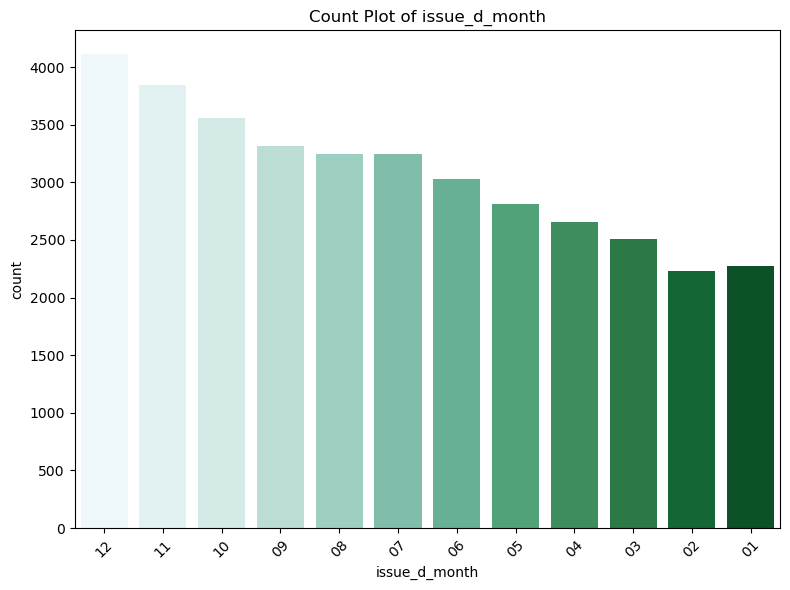

In [39]:
univariate_analysis('issue_d_month',df, plot_type='bar', palette='BuGn')

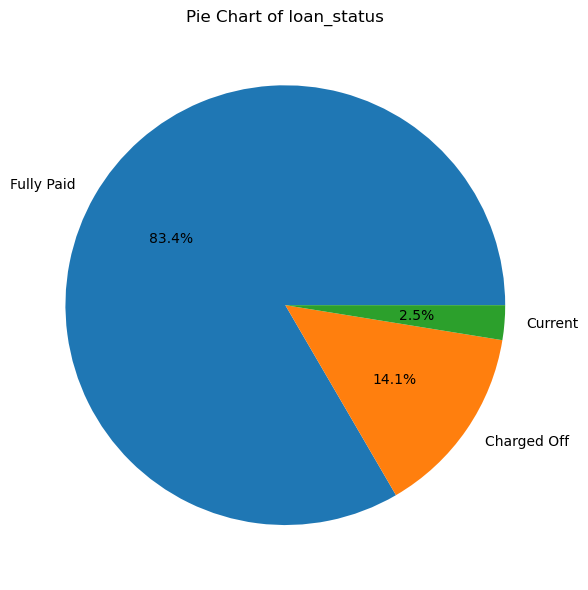

In [40]:
univariate_analysis('loan_status',df, plot_type='pie')

### Insights from issue_d_year and issue_d_month

- As clearly seen, year on year number of loans increased. 
- We can also observe that we have data for 5 years starting 2007 and ending 2011
- Since the inception of the business, month on month loan issuance has shown an increasing trend

### Insights from Grade and Sub Grade

- The maximum number of applicants fall under category B > A > C> D > E > F > G

### Insights from Loan_Status
- There is 14.1% loans that are charged off.



## Bivariate Analysis

**Bivariate Analysis against the Target:**
1. Loan-to-Income Ratio (loan_to_income): Measures the loan amount relative to the borrower's income, indicating the borrower's debt burden.
2. Employment Length Category (emp_length_cat): Converts continuous employment length into categorical bins to help us understand the pattern of defaulters.
3. Employment Length Missing (emp_length_missing) : Used to check how important are the employment length values to be checked before approving the loan.
4. Credit Line Age (credit_line_age) - Measures the age of the oldest credit line to gauge the borrower's credit history length.

### loan_to_income

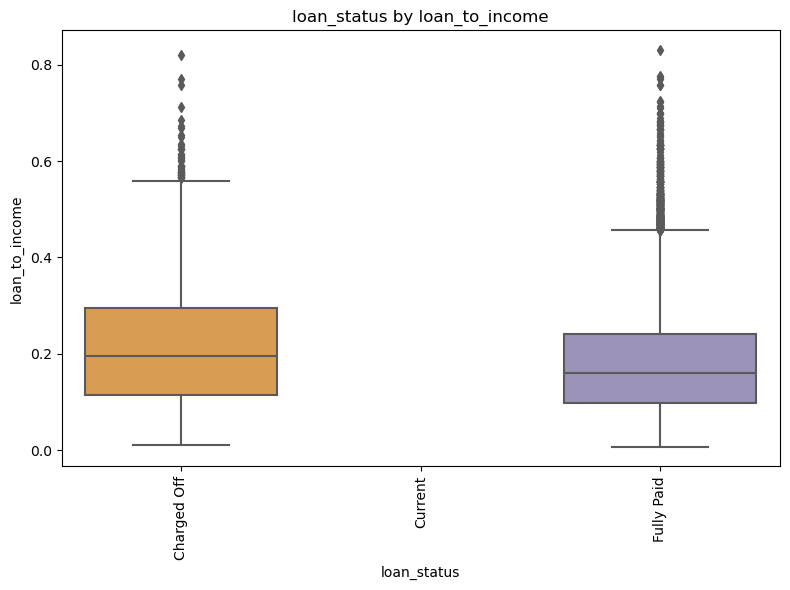

In [41]:
# Create a boxplot to visualize the distribution of loan_to_income for defaulters and non-defaulters
bivariate_analysis(df, 'loan_status', 'loan_to_income', plot_type='box', palette='PuOr')

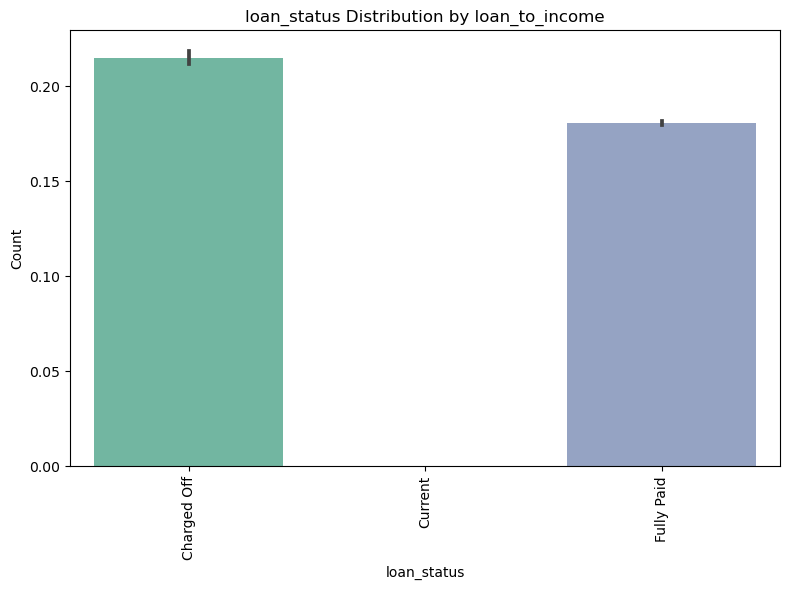

In [42]:
bivariate_analysis(df, 'loan_status', 'loan_to_income', plot_type='bar', palette='Set2')

loan_status         Charged Off  Current  Fully Paid  Total  \
loan_to_income_cat                                            
0.007-0.088                 844       80        6444   7368   
0.088-0.139                 841      104        6436   7381   
0.139-0.197                 923      151        6279   7353   
0.197-0.277                1093      233        6041   7367   
0.277-0.83                 1478      370        5520   7368   

loan_status         Percentage_fully_paid  Percentage_charge_off  
loan_to_income_cat                                                
0.007-0.088                         87.46                  11.45  
0.088-0.139                         87.20                  11.39  
0.139-0.197                         85.39                  12.55  
0.197-0.277                         82.00                  14.84  
0.277-0.83                          74.92                  20.06  


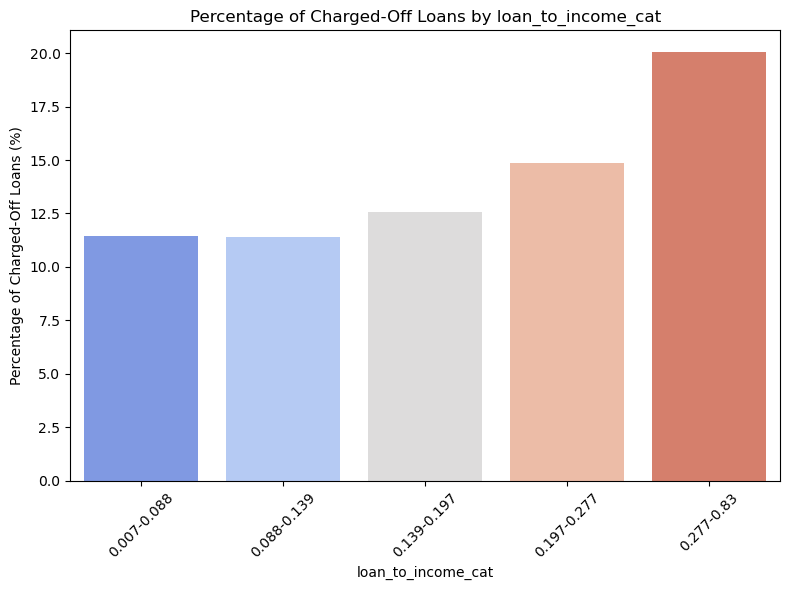

In [43]:
plot_defaulting_percent(df, 'loan_to_income_cat')

#### Insights of Loan-to-Income Ratio (loan_to_income):
Insights: 
- A higher loan-to-income ratio may indicate a higher risk of default.
- Frequency of loans given if the loan-to-income ratio is less are more.
- The applicants with loan-to-income > 0.25 has the charge off percentage > 18.30%

### employment length

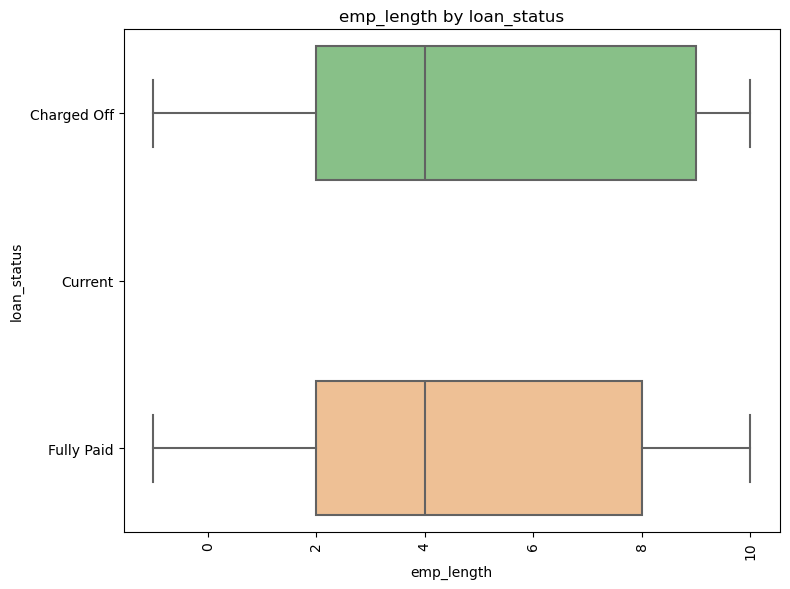

In [44]:
bivariate_analysis(df, 'emp_length', 'loan_status', plot_type='box', palette='Accent')

loan_status  Charged Off  Current  Fully Paid  Total  Percentage_fully_paid  \
emp_length                                                                    
-1.0                 220       37         781   1038                  75.24   
 0.0                 599       64        3685   4348                  84.75   
 1.0                 437       61        2573   3071                  83.78   
 2.0                 534       82        3523   4139                  85.12   
 3.0                 509       65        3264   3838                  85.04   
 4.0                 427       84        2720   3231                  84.18   
 5.0                 422       73        2558   3053                  83.79   
 6.0                 285       52        1744   2081                  83.81   
 7.0                 239       57        1366   1662                  82.19   
 8.0                 183       35        1122   1340                  83.73   
 9.0                 148       27         991   1166

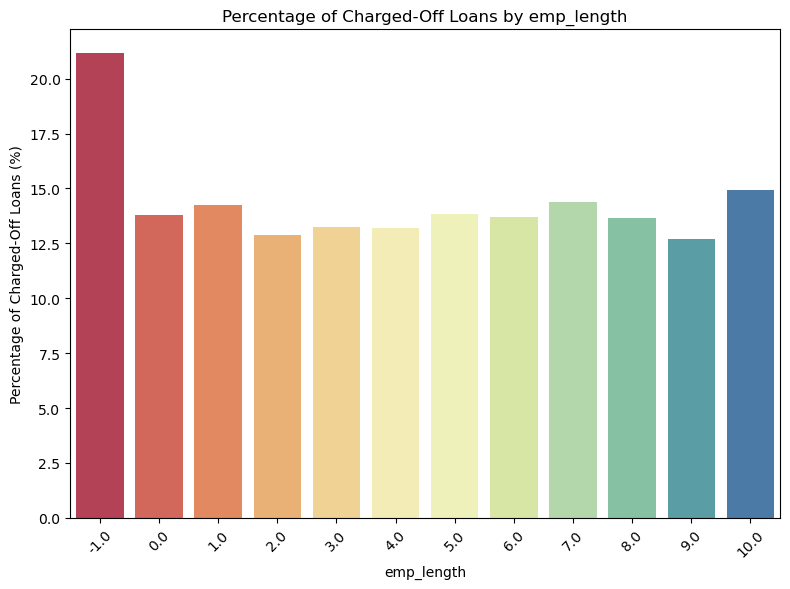

In [45]:
plot_defaulting_percent(df, 'emp_length', palette='Spectral')

#### **Insights**

- There are maximum number of employee with 10 years of tenure.
- The percentage to default is also more when the employee tenure is 10 years, hence it should be checked against the other scores like the open_acc or pub_rec or inq_last_6mths
- The % of defaulters increase if the emp length is 10 years
- Hence started to plot these with the **combination of loan_amnt** to check if borrowers with longer employment lengths take out larger loans, they might have a higher absolute number of defaults simply due to the larger volume of loans.
- Also could see that the **defaulters are more when the employment length data is missing** and is 21.26%

### inq_last_6mnts

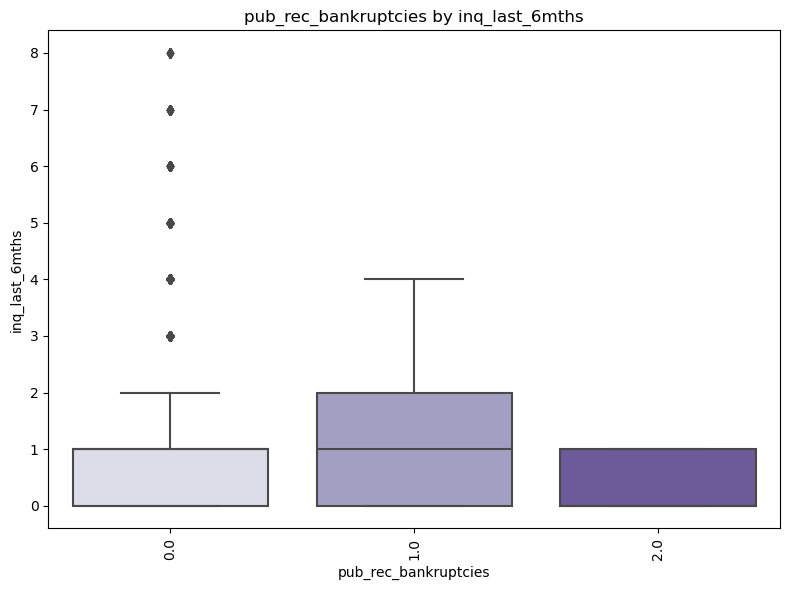

In [46]:
bivariate_analysis(df, 'pub_rec_bankruptcies', 'inq_last_6mths', plot_type='box', palette ="Purples")

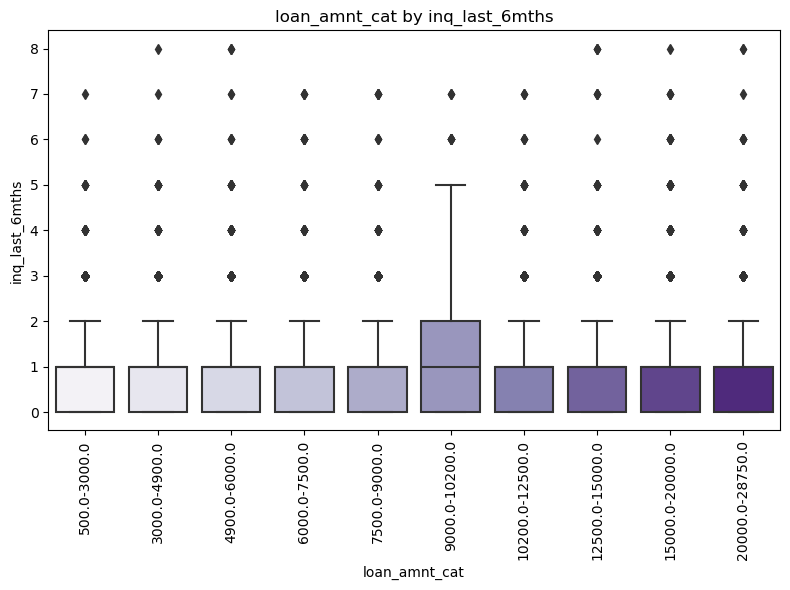

In [47]:
bivariate_analysis(df, 'loan_amnt_cat', 'inq_last_6mths', plot_type='box', palette ="Purples")

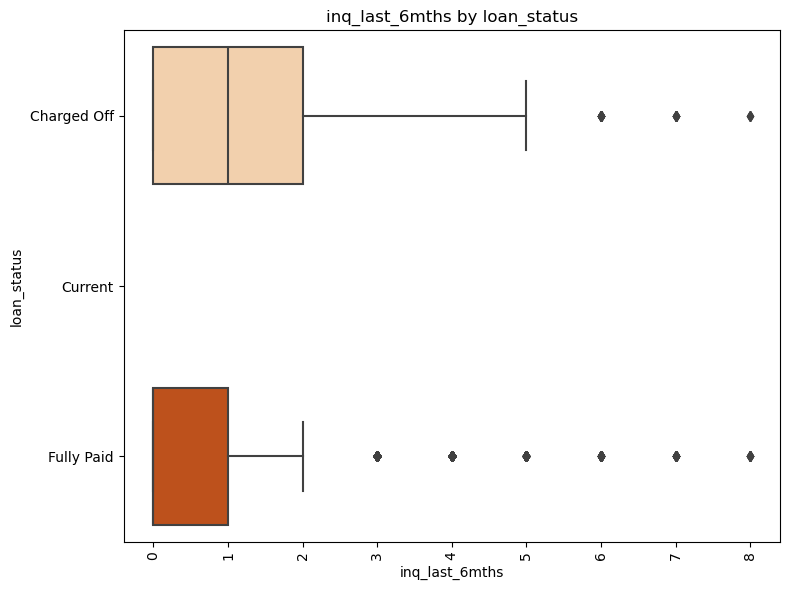

In [48]:
bivariate_analysis(df, 'inq_last_6mths', 'loan_status', plot_type='box' , palette ="Oranges")

loan_status     Charged Off  Current  Fully Paid  Total  \
inq_last_6mths                                            
0                      2105      475       15396  17976   
1                      1534      263        8394  10191   
2                       878      131        4354   5363   
3                       567       55        2169   2791   
4                        45       10         234    289   
5                        23        1         106    130   
6                        15        1          38     54   
7                         9        1          21     31   
8                         3        1           8     12   

loan_status     Percentage_fully_paid  Percentage_charge_off  
inq_last_6mths                                                
0                               85.65                  11.71  
1                               82.37                  15.05  
2                               81.19                  16.37  
3                               77.

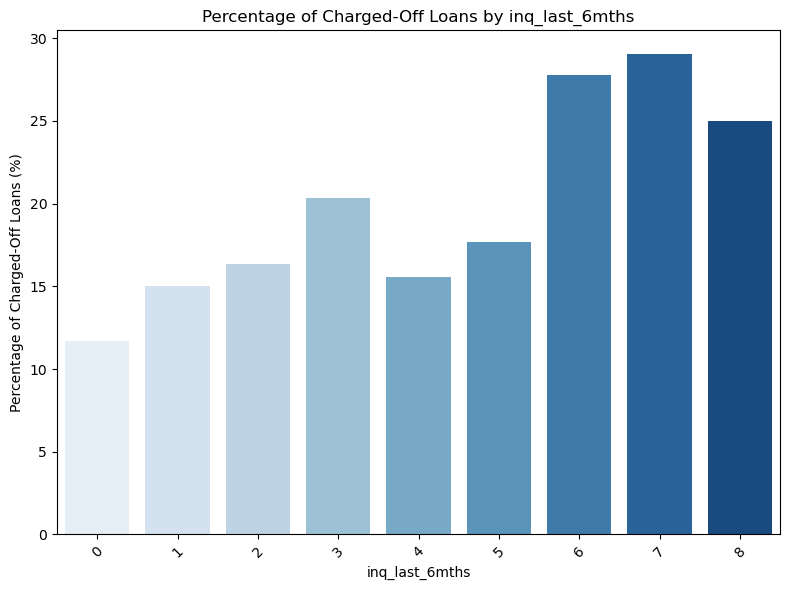

In [49]:
plot_defaulting_percent(df, 'inq_last_6mths', palette="Blues")

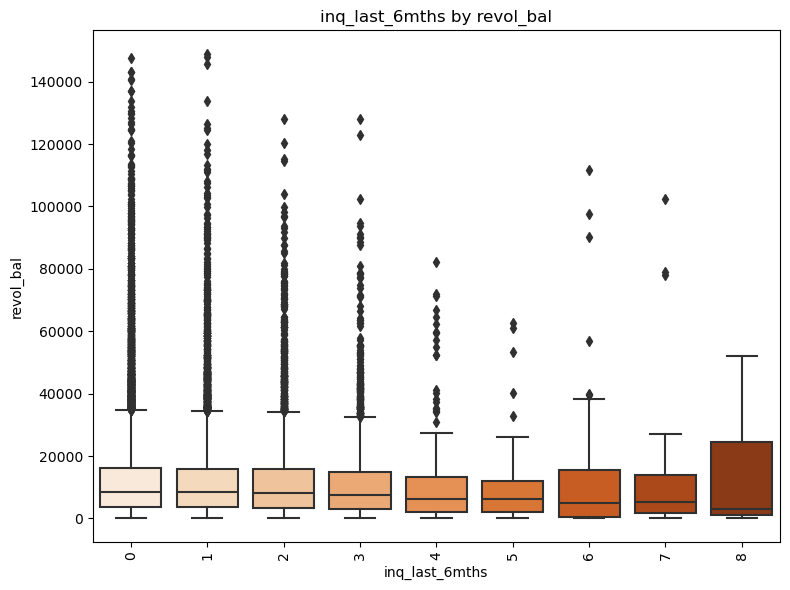

In [50]:
bivariate_analysis(df, 'inq_last_6mths', 'revol_bal', plot_type='box' , palette ="Oranges")

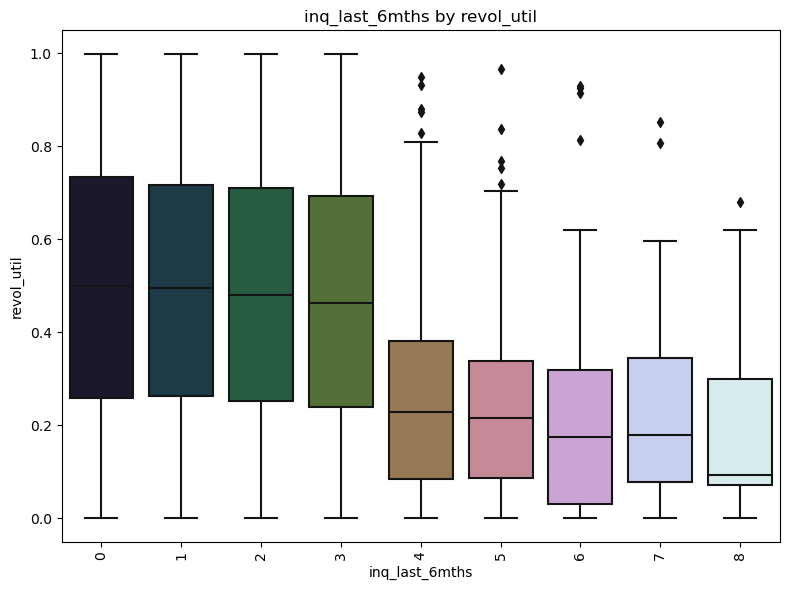

In [51]:
bivariate_analysis(df, 'inq_last_6mths', 'revol_util', plot_type='box' , palette ="cubehelix")

#### Insights:
Borrowers with more than 6 credit inquiries in the last 6 months show a significant increase in default risk, with the percentage of charged-off loans rising sharply from 11.71% to 25%.

### Purpose

loan_status         Charged Off  Current  Fully Paid  Total  \
purpose                                                       
car                         158       49        1296   1503   
credit_card                 501       83        4203   4787   
debt_consolidation         2530      476       14293  17299   
educational                  54        0         259    313   
home_improvement            312       72        2193   2577   
house                        51        9         274    334   
major_purchase              215       34        1819   2068   
medical                     102        9         537    648   
moving                       90        6         459    555   
other                       591      113        3071   3775   
renewable_energy             17        1          76     94   
small_business              415       61        1131   1607   
vacation                     52        6         312    370   
wedding                      91       19         797   

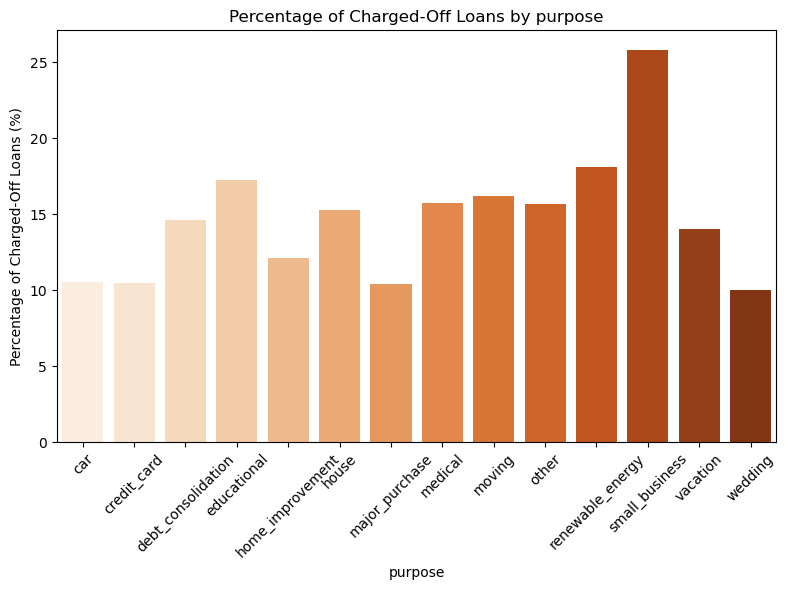

In [52]:
plot_defaulting_percent(df, 'purpose', palette="Oranges")

### loan_amnt 

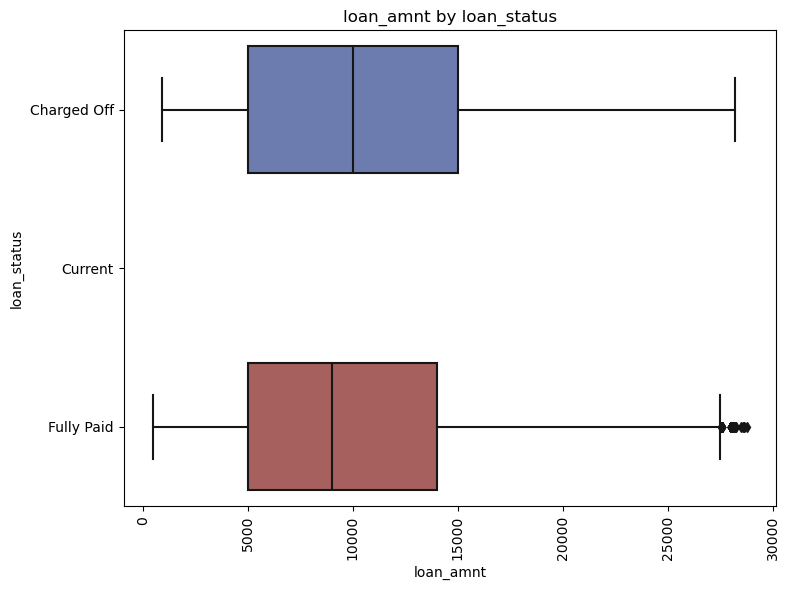

In [53]:
bivariate_analysis(df, 'loan_amnt', 'loan_status', plot_type='box' , palette ="twilight")

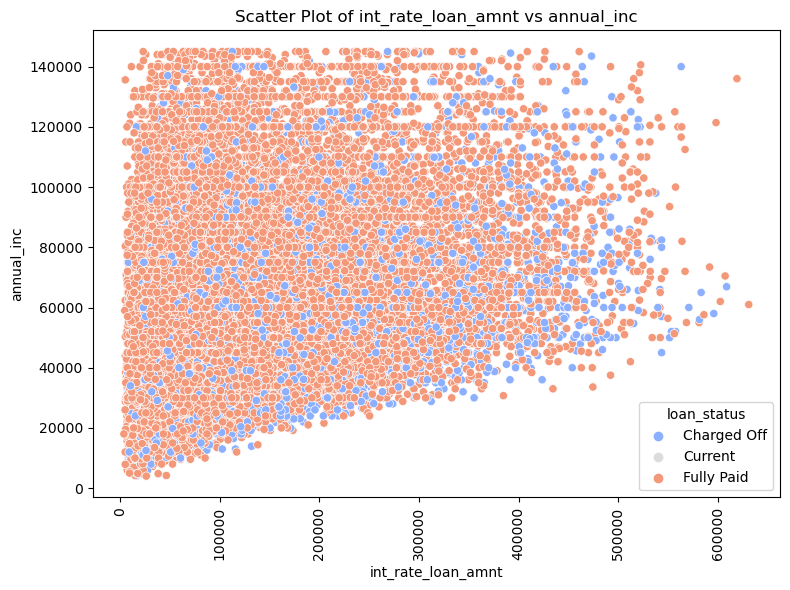

In [54]:
bivariate_analysis(df, 'int_rate_loan_amnt', 'annual_inc', hue='loan_status', plot_type='scatter')

loan_status      Charged Off  Current  Fully Paid  Total  \
loan_amnt_cat                                              
500.0-3000.0             542       32        3246   3820   
3000.0-4900.0            468       40        3066   3574   
4900.0-6000.0            616       60        4169   4845   
6000.0-7500.0            361       39        2601   3001   
7500.0-9000.0            453       39        2742   3234   
9000.0-10200.0           474       37        3127   3638   
10200.0-12500.0          472      119        3089   3680   
12500.0-15000.0          538      171        3172   3881   
15000.0-20000.0          717      223        3343   4283   
20000.0-28750.0          538      178        2165   2881   

loan_status      Percentage_fully_paid  Percentage_charge_off  
loan_amnt_cat                                                  
500.0-3000.0                     84.97                  14.19  
3000.0-4900.0                    85.79                  13.09  
4900.0-6000.0          

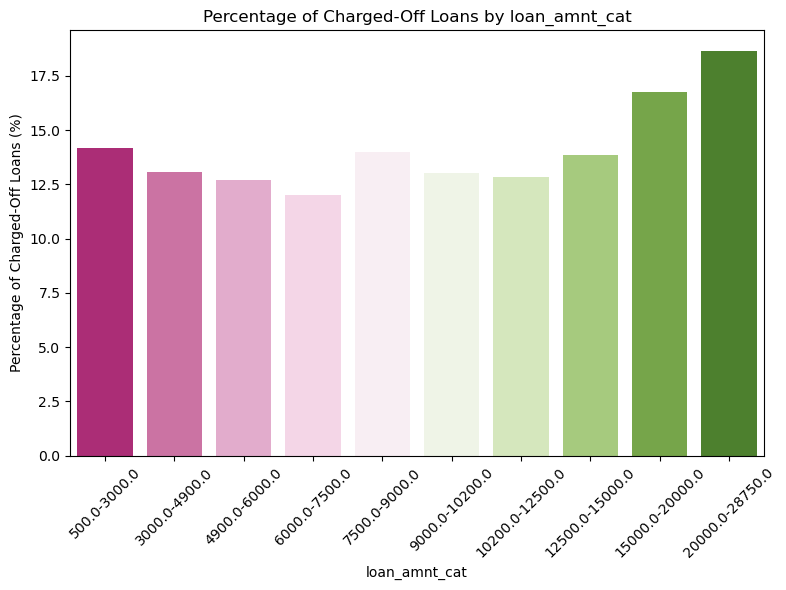

In [55]:
plot_defaulting_percent(df, 'loan_amnt_cat', palette="PiYG")

### Credit Line Age

loan_status          Charged Off  Current  Fully Paid  Total  \
credit_line_age_cat                                            
-60.0-7.915                 1128      105        6219   7452   
7.915-10.998                1000      143        6203   7346   
10.998-13.747               1082      187        6063   7332   
13.747-17.916               1010      240        6098   7348   
17.916-42.409                959      263        6137   7359   

loan_status          Percentage_fully_paid  Percentage_charge_off  
credit_line_age_cat                                                
-60.0-7.915                          83.45                  15.14  
7.915-10.998                         84.44                  13.61  
10.998-13.747                        82.69                  14.76  
13.747-17.916                        82.99                  13.75  
17.916-42.409                        83.39                  13.03  


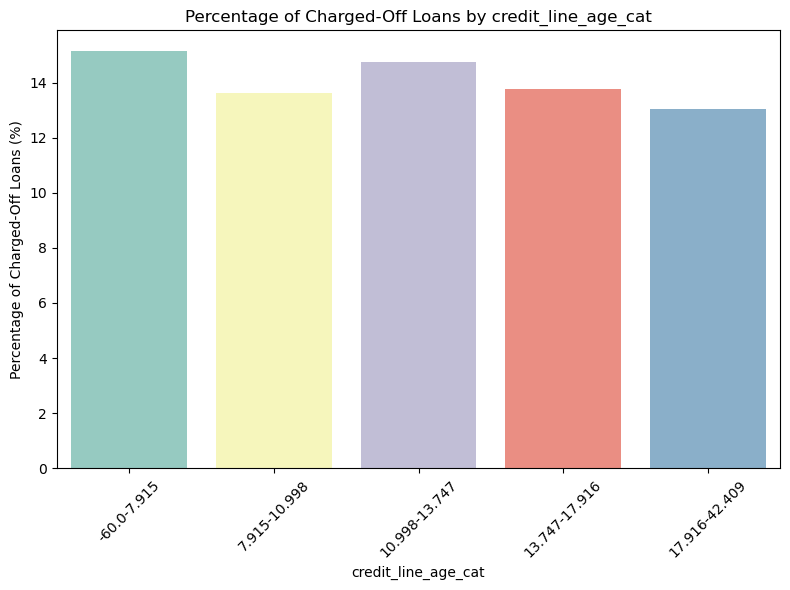

In [56]:
plot_defaulting_percent(df, 'credit_line_age_cat', palette="Set3")

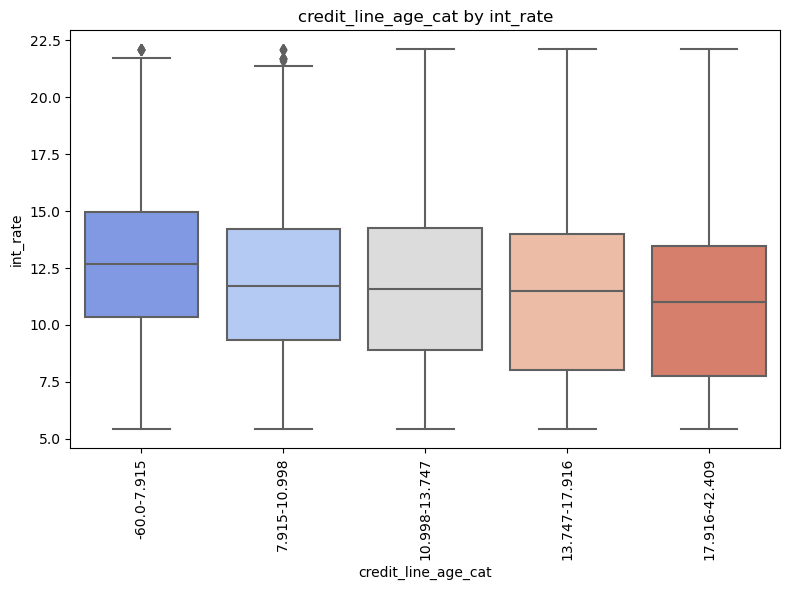

In [57]:
bivariate_analysis(df, 'credit_line_age_cat', 'int_rate', hue='loan_status', plot_type='box')

#### Insights:
Credit Line Age can never be negative in the realtime context.
Potential Reasons for these negative values:

- **Data Entry Errors:** Mistakes in recording dates or inconsistent formats can result in incorrect credit line age calculations.
- **Delayed Credit Line Reporting:** Sometimes, credit lines may be reported after the loan issue date due to delays in data updates.
- **Credit Card Acquisition Post-Loan:** A borrower might have opened a credit card after the loan was issued, but this should be reflected in the credit history records rather than affecting the loan's data.

Looking at the positive values starting from -8.795-4.006 bucket, it is very much clear that the higher the credit line, the lower the default rate.


### Revol_Util

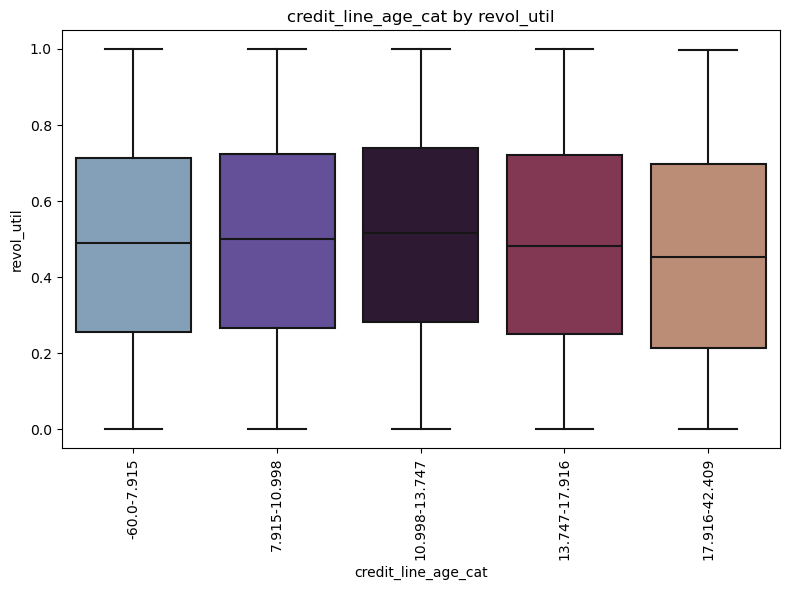

In [58]:
bivariate_analysis(df, 'credit_line_age_cat', 'revol_util', plot_type='box' , palette ="twilight")

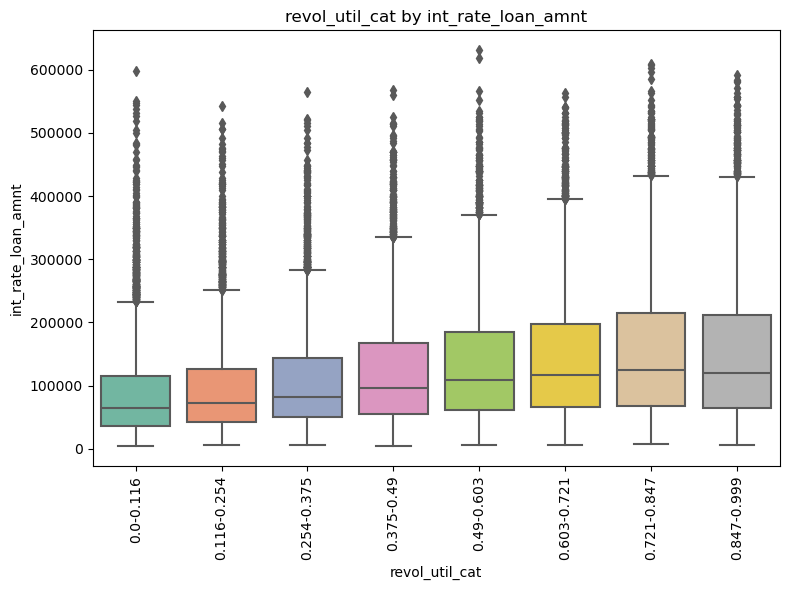

In [59]:
bivariate_analysis(df, 'revol_util_cat', 'int_rate_loan_amnt', plot_type='box' , palette ="Set2")

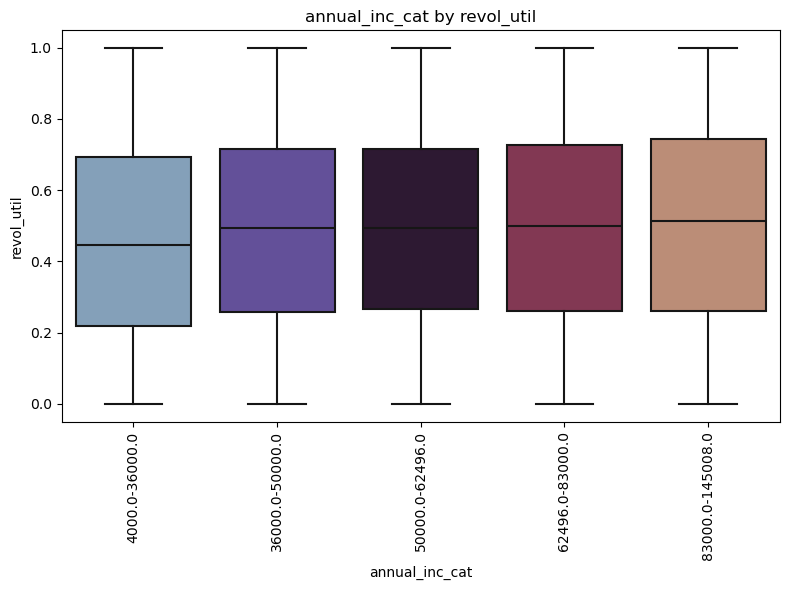

In [60]:
bivariate_analysis(df, 'annual_inc_cat', 'revol_util', plot_type='box' , palette ="twilight")

loan_status     Charged Off  Current  Fully Paid  Total  \
revol_util_cat                                            
0.0-0.116               441       79        4115   4635   
0.116-0.254             458       98        4036   4592   
0.254-0.375             558      117        3920   4595   
0.375-0.49              633      114        3879   4626   
0.49-0.603              657      125        3796   4578   
0.603-0.721             706      147        3793   4646   
0.721-0.847             826      125        3623   4574   
0.847-0.999             900      133        3558   4591   

loan_status     Percentage_fully_paid  Percentage_charge_off  
revol_util_cat                                                
0.0-0.116                       88.78                   9.51  
0.116-0.254                     87.89                   9.97  
0.254-0.375                     85.31                  12.14  
0.375-0.49                      83.85                  13.68  
0.49-0.603                     

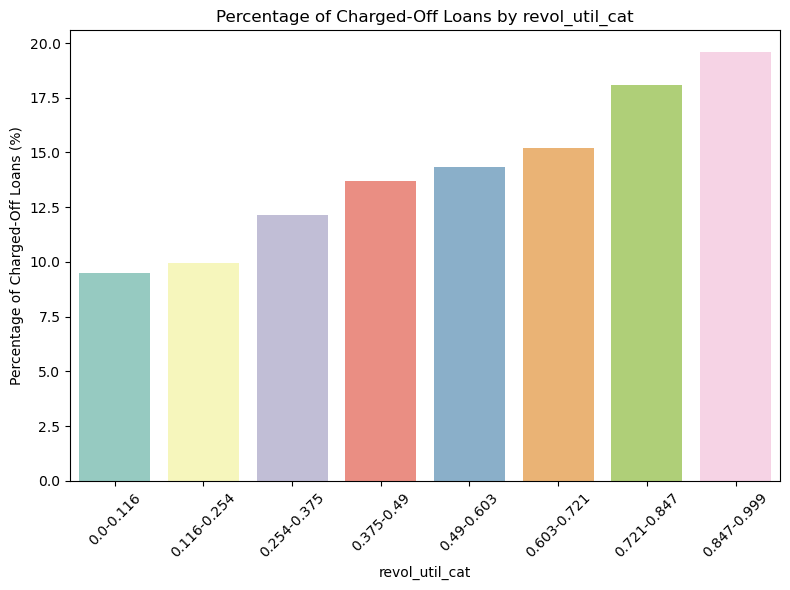

In [61]:
plot_defaulting_percent(df, 'revol_util_cat', palette="Set3")

### Home_Ownership

loan_status     Charged Off  Current  Fully Paid  Total  \
home_ownership                                            
MORTGAGE               2055      491       13147  15693   
NONE                      0        0           3      3   
OTHER                    17        0          76     93   
OWN                     419       72        2390   2881   
RENT                   2688      375       15104  18167   

loan_status     Percentage_fully_paid  Percentage_charge_off  
home_ownership                                                
MORTGAGE                        83.78                  13.10  
NONE                           100.00                   0.00  
OTHER                           81.72                  18.28  
OWN                             82.96                  14.54  
RENT                            83.14                  14.80  


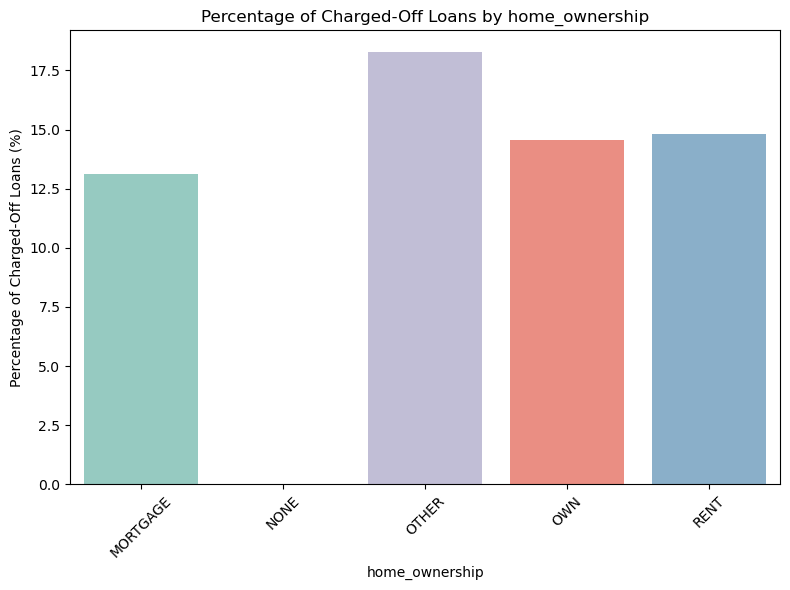

In [62]:
plot_defaulting_percent(df, 'home_ownership', palette="Set3")

#### Insights:
The percentage of charged offs higher if the home-ownership is of type "Other" and is showing ~18%

### DTI

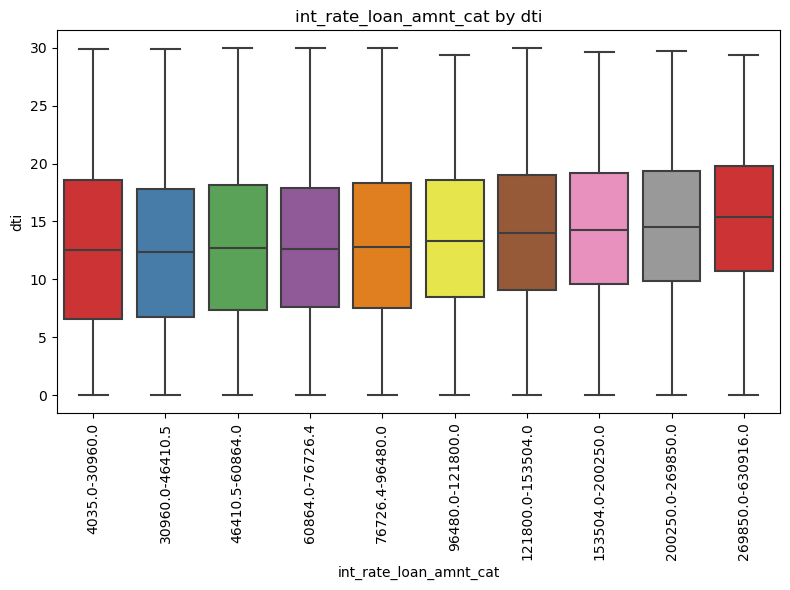

In [63]:
bivariate_analysis(df, 'int_rate_loan_amnt_cat', 'dti', plot_type='box' , palette ="Set1")

loan_status  Charged Off  Current  Fully Paid  Total  Percentage_fully_paid  \
dti_cat                                                                       
0.0-7.14             897      124        6355   7376                  86.16   
7.14-11.59           937      179        6255   7371                  84.86   
11.59-15.51         1056      179        6122   7357                  83.21   
15.51-19.87         1117      189        6069   7375                  82.29   
19.87-29.99         1172      267        5919   7358                  80.44   

loan_status  Percentage_charge_off  
dti_cat                             
0.0-7.14                     12.16  
7.14-11.59                   12.71  
11.59-15.51                  14.35  
15.51-19.87                  15.15  
19.87-29.99                  15.93  


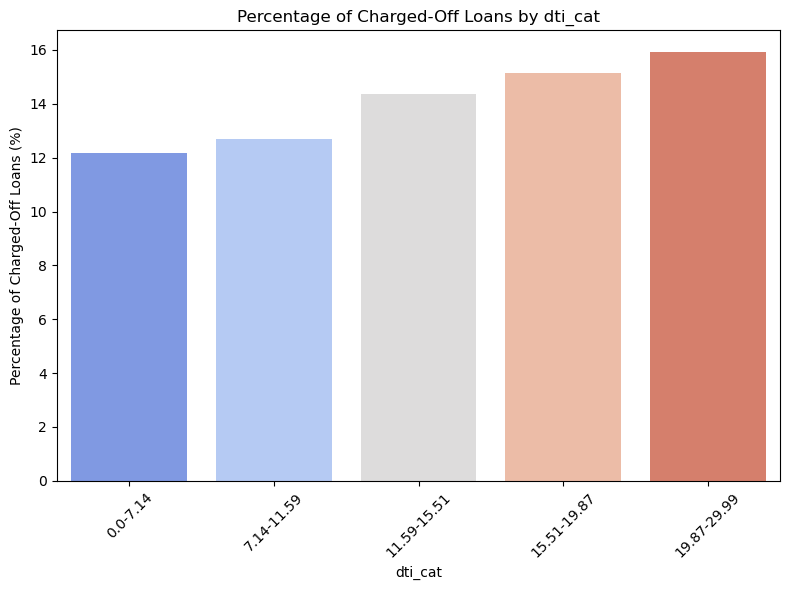

In [64]:
plot_defaulting_percent(df, 'dti_cat', palette="coolwarm")

### Term

loan_status  Charged Off  Current  Fully Paid  Total  Percentage_fully_paid  \
term                                                                          
 36 months          3096        0       24532  27628                  88.79   
 60 months          2083      938        6188   9209                  67.20   

loan_status  Percentage_charge_off  
term                                
 36 months                   11.21  
 60 months                   22.62  


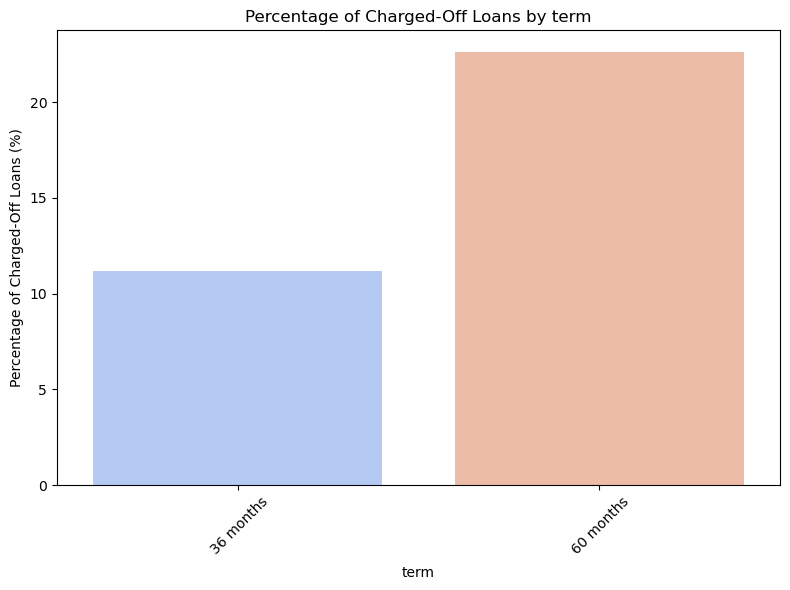

In [65]:
plot_defaulting_percent(df, 'term', palette="coolwarm")

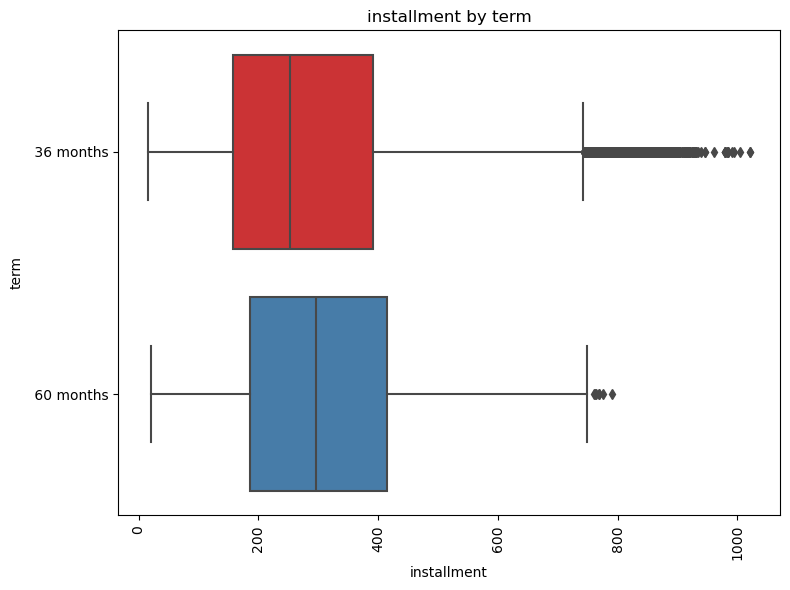

In [66]:
bivariate_analysis(df, 'installment', 'term', plot_type='box' , palette ="Set1")

### Verification Status

loan_status          Charged Off  Current  Fully Paid  Total  \
verification_status                                            
Not Verified                2093      223       14212  16528   
Source Verified             1337      267        7733   9337   
Verified                    1749      448        8775  10972   

loan_status          Percentage_fully_paid  Percentage_charge_off  
verification_status                                                
Not Verified                         85.99                  12.66  
Source Verified                      82.82                  14.32  
Verified                             79.98                  15.94  


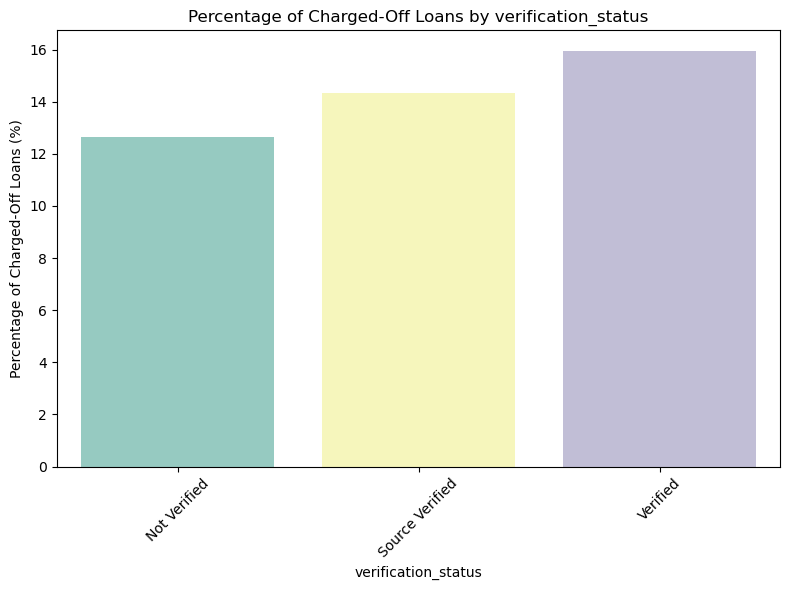

In [67]:
plot_defaulting_percent(df, 'verification_status', palette="Set3")

### Grade

loan_status  Charged Off  Current  Fully Paid  Total  Percentage_fully_paid  \
grade                                                                         
A                    591       39        9035   9665                  93.48   
B                   1350      283        9633  11266                  85.51   
C                   1291      230        6076   7597                  79.98   
D                   1045      197        3683   4925                  74.78   
E                    599      145        1636   2380                  68.74   
F                    242       40         534    816                  65.44   
G                     61        4         123    188                  65.43   

loan_status  Percentage_charge_off  
grade                               
A                             6.11  
B                            11.98  
C                            16.99  
D                            21.22  
E                            25.17  
F                            

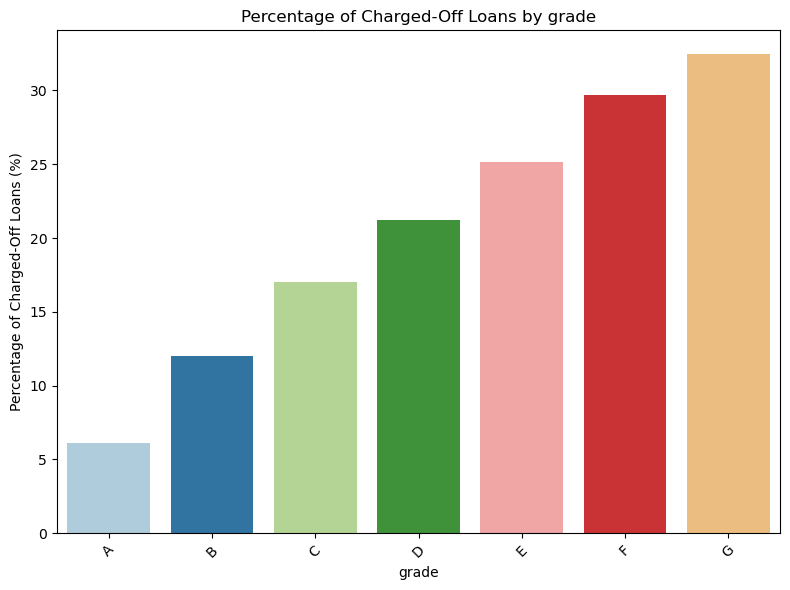

In [68]:
plot_defaulting_percent(df, 'grade', palette="Paired")

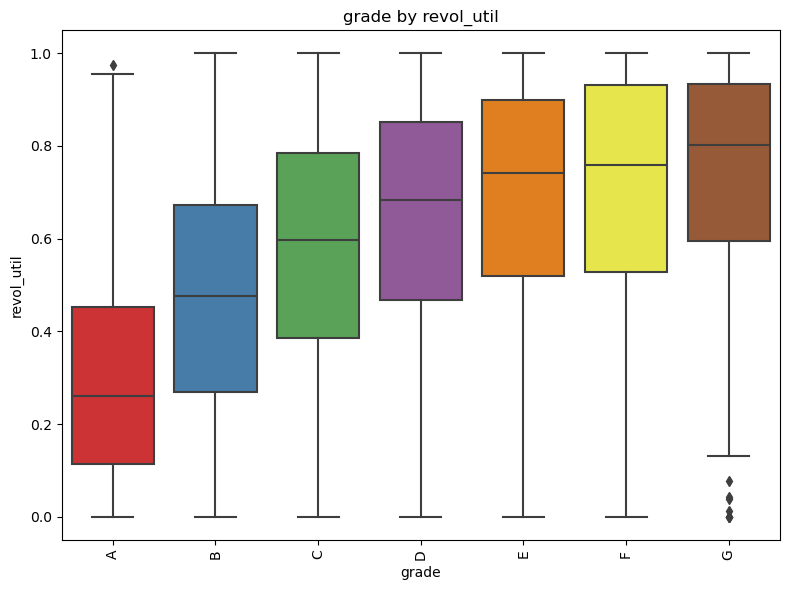

In [69]:
bivariate_analysis(df, 'grade', 'revol_util', plot_type='box' , palette ="Set1")

### Installment

loan_status      Charged Off  Current  Fully Paid  Total  \
installment_cat                                            
15.69-143.532           1059      126        6183   7368   
143.532-219.722          955       97        6315   7367   
219.722-316.002          992      210        6165   7367   
316.002-445.04          1063      252        6053   7368   
445.04-1021.0           1110      253        6004   7367   

loan_status      Percentage_fully_paid  Percentage_charge_off  
installment_cat                                                
15.69-143.532                    83.92                  14.37  
143.532-219.722                  85.72                  12.96  
219.722-316.002                  83.68                  13.47  
316.002-445.04                   82.15                  14.43  
445.04-1021.0                    81.50                  15.07  


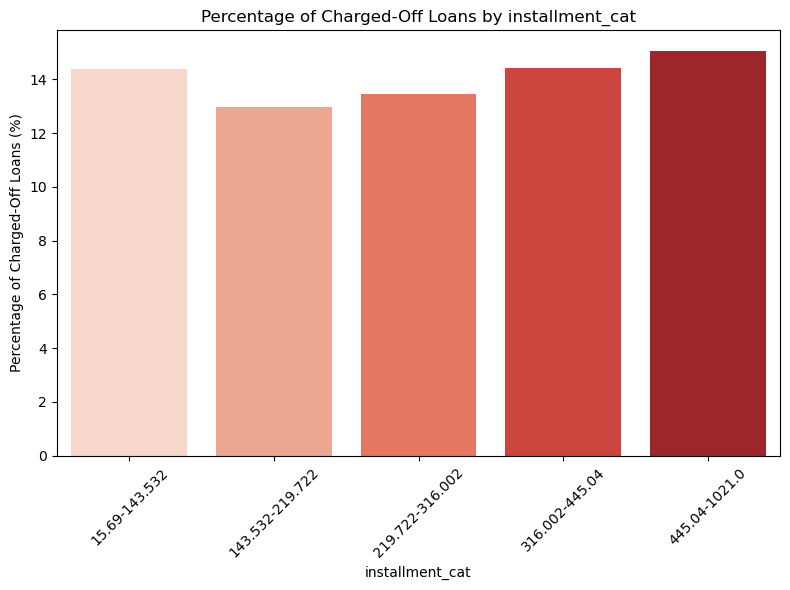

In [70]:
plot_defaulting_percent(df, 'installment_cat', palette="Reds")

### Annual Income

loan_status       Charged Off  Current  Fully Paid  Total  \
annual_inc_cat                                              
4000.0-36000.0           1344      132        6012   7488   
36000.0-50000.0          1259      221        6749   8229   
50000.0-62496.0           928      179        5280   6387   
62496.0-83000.0           910      204        6285   7399   
83000.0-145008.0          738      202        6394   7334   

loan_status       Percentage_fully_paid  Percentage_charge_off  
annual_inc_cat                                                  
4000.0-36000.0                    80.29                  17.95  
36000.0-50000.0                   82.01                  15.30  
50000.0-62496.0                   82.67                  14.53  
62496.0-83000.0                   84.94                  12.30  
83000.0-145008.0                  87.18                  10.06  


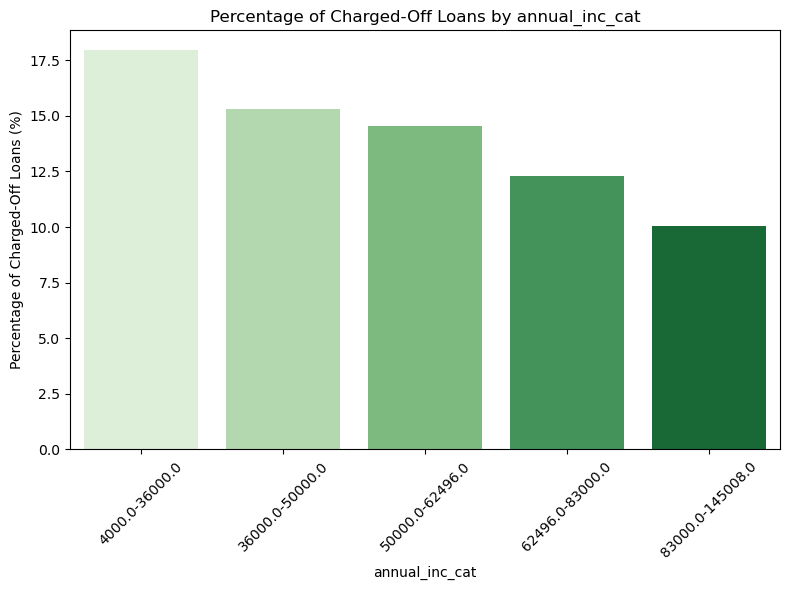

In [71]:
plot_defaulting_percent(df, 'annual_inc_cat', palette="Greens")

### public_rec_bankruptcies

loan_status           Charged Off  Current  Fully Paid  Total  \
pub_rec_bankruptcies                                            
0.0                          4718      905       28943  34566   
1.0                           346       32        1226   1604   
2.0                             2        1           3      6   

loan_status           Percentage_fully_paid  Percentage_charge_off  
pub_rec_bankruptcies                                                
0.0                                   83.73                  13.65  
1.0                                   76.43                  21.57  
2.0                                   50.00                  33.33  


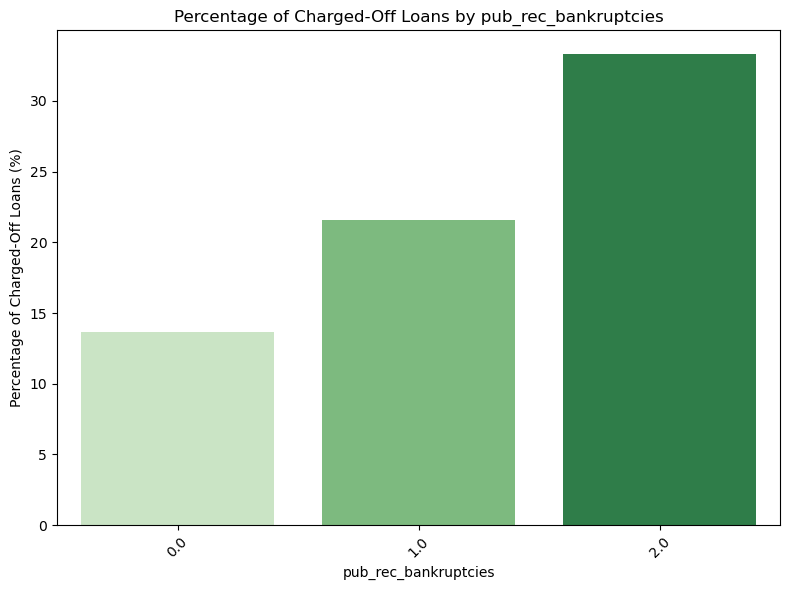

In [72]:
plot_defaulting_percent(df, 'pub_rec_bankruptcies', palette="Greens")

## Multi Variate Analysis

In [73]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'emp_length_missing', 'loan_to_income',
       'credit_line_age', 'int_rate_loan_amnt', 'issue_d_year',
       'issue_d_month', 'loan_to_income_cat', 'loan_amnt_cat',
       'annual_inc_cat', 'int_rate_loan_amnt_cat', 'credit_line_age_cat',
       'revol_util_cat', 'dti_cat', 'installment_cat', 'emp_length_cat'],
      dtype='object')

In [74]:
numerical_cols1 = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'delinq_2yrs', 'open_acc', 'pub_rec_bankruptcies', 'revol_util',
    'revol_bal', 'total_acc', 'inq_last_6mths', 'loan_to_income', 'credit_line_age'
]

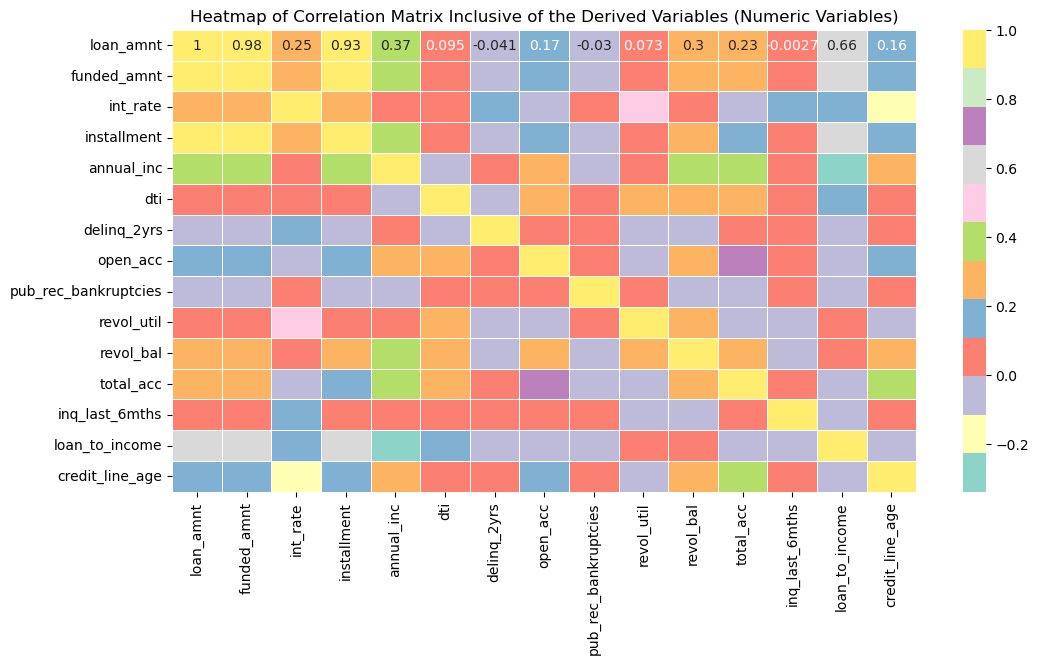

In [75]:
numeric_data = df[numerical_cols1]
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set3', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix Inclusive of the Derived Variables (Numeric Variables)')
plt.show()

#### Insights:
We are able to observe correlation for
1. pub_rec_bankruptcies and pub_rec -> these two attributes are highly correlated
2. revol_util and int_rate -> these two attributes are moderately correlated. Indicated that if revolving utilization is high then interest rate is high
3. int_rate and credit_line_age -> these two are negatively correlated. If one increases, the other decreases

### Pair Plot

In [ ]:
# Plotting pair plot for numeric variables
sns.pairplot(df[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
    'dti', 'delinq_2yrs', 'open_acc', 'pub_rec_bankruptcies', 'revol_util',
    'revol_bal', 'total_acc', 'inq_last_6mths', 'loan_to_income', 'credit_line_age']])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()


## Overall Insights:


- Higher DTI implies Higher Charge Off % 
- Higher Revolving Utilization implies Higher Charge Off % 
- Higher Loan Amount greater then $12,000 implies Higher Default Risk
- Higher Interest Rates implies Higher Default %
- Higher the Installment beyond the 60% quartile, Higher the Charge Off %
- Higher the Loan-to-Income (LTI), higher the risk.
- Higher the Public Record Bankruptcies , higher is the risk.
- Higher the missing employee records %, higher is the default rate.
- Higher Annual Income implies Lower Default Risk
- Lower the Credit Line Age, Higher the Default Rate